<a href="https://colab.research.google.com/github/nestrada79/MSDA/blob/main/D206/D206.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import package statements and user defined functions

In [ ]:
!pip install scikit-learn==1.1.2


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 23.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
!pip install scipy==1.9.1


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 MB 7.3 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1


In [ ]:
!pip install missingpy==0.2.0


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 kB 609.6 kB/s eta 0:00:00


In [ ]:
!pip show scipy missingpy scikit-learn


Name: scipy
Version: 1.9.1
Summary: SciPy: Scientific Library for Python
Home-page: https://www.scipy.org
Author: 
Author-email: 
License: BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: numpy
Required-by: albumentations, arviz, cvxpy, datascience, ecos, fastai, gensim, hyperopt, imbalanced-learn, imgaug, jax, jaxlib, librosa, lightgbm, matplotlib-venn, missingno, mizani, mlxtend, osqp, plotnine, pymc, pytensor, qdldl, scikit-image, scikit-learn, scs, sklearn-pandas, statsmodels, xarray-einstats, xgboost, yellowbrick
---
Name: missingpy
Version: 0.2.0
Summary: Missing Data Imputation for Python
Home-page: https://github.com/epsilon-machine/missingpy
Author: Ashim Bhattarai
Author-email: 
License: UNKNOWN
Location: /usr/local/lib/python3.10/dist-packages
Requires: 
Required-by: 
---
Name: scikit-learn
Version: 1.1.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /

In [ ]:
#Import packages
import pandas as pd
import warnings
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.neighbors._base
import sys
import numpy as np
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
from missingpy import MissForest
from pandas.errors import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [ ]:
#Options

#Ensures pandas dataframes aren't truntuacted
pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None  # default='warn'

# Function to identify potential outliers in a column using IQR method
def identify_outliers_iqr(column_data):
    Q1 = column_data.quantile(0.25)
    Q3 = column_data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column_data[(column_data < lower_bound) | (column_data > upper_bound)]


#  **Part I: Research Question**

Does the administration of vitamin D supplements impact readmission rates or the severity of complications for specific medical conditions?



## Section B: Variables Description

Describe all variables in the data set (regardless of the research question) and indicate the data type for each variable. Use examples from the data set to support your claims.

## Data Dictionary


The data set includes the following information:
- Patients who are readmitted to the hospital within a month of release (the "ReAdmis" column)
- Patient medical conditions (high blood pressure, stroke, obesity, arthritis, diabetes, etc.)
- Patient information (service they received while hospitalized, days in hospital, type of initial admission, etc.)
- Patient demographic information (gender, age, job, education level, etc.)

The data set consists of 10,000 customers and 50 columns/variables.

| Column              | Description                                                           | Type        | Example |
|---------------------|-----------------------------------------------------------------------|-------------|---------|
| Unnamed: 0          | A placeholder variable to preserve the original order of the raw data file | Quantitative |     1    |
| CaseOrder           | A unique identifier for each case                                      | Quantitative |      1   |
| Customer_id         | Unique patient ID                                                     | Qualitative |  C412403   |
| Interaction         | Unique IDs related to patient transactions procedures and admissions  | Qualitative |    8cd49b13-f45a-4b47-a2bd-173ffa932c2f     |
| UID                 | Unique identifier                                                     | Qualitative |3a83ddb66e2ae73798bdf1d705dc0932         |
| City                | Patient city of residence as listed on the billing statement          | Qualitative | Eva         |
| State               | Patient state of residence as listed on the billing statement         | Qualitative | AL        |
| County              | Patient county of residence as listed on the billing statement        | Qualitative |   Morgan      |
| Zip                 | Patient zip code of residence as listed on the billing statement      | Quantitative |    35621     |
| Lat                 | GPS coordinates of patient residence as listed on the billing statement | Quantitative | 34.34960        |
| Lng                 | GPS coordinates of patient residence as listed on the billing statement | Quantitative | -86.72508     |
| Population          | Population within a mile radius of the patient, based on census data  | Quantitative | 11303        |
| Area                | Area type (urban, suburban) based on unofficial census data            | Qualitative | Urban        |
| Timezone            | Time zone of patient residence based on patient's sign up information | Qualitative | America/Chicago        |
| Job                 | Job of the patient (or primary insurance holder) as reported in the admissions information | Qualitative | Psychologist, sport and exercise	        |
| Children            | Number of children in the patient's household as reported in the admissions information | Quantitative | 1.0        |
| Age                 | Age of the patient as reported in admissions information              | Quantitative |  53.0       |
| Education           | Highest earned degree of the patient as reported in admissions information | Qualitative | Some College, Less than 1 Year        |
| Employment          | Employment status of the patient as reported in admissions information | Qualitative | Full Time        |
| Income              | Annual income of the patient (or primary insurance holder) as reported at the time of admission | Quantitative | 86575.93        |
| Marital             | Marital status of the patient (or primary insurance holder) as reported on admission information | Qualitative | Divorce         |
| Gender              | Customer self-identification as male, female, or nonbinary            | Qualitative | Male        |
| ReAdmis             | Whether the patient was readmitted within a month of release or not   | Qualitative | No       |
| VitD_levels         | The patient's vitamin D levels as measured in ng/mL                   | Quantitative | 17.80233        |
| Doc_visits          | Number of times the primary physician visited the patient during the initial hospitalization | Quantitative |    5     |
| Full_meals_eaten    | Number of full meals the patient ate while hospitalized (partial meals count as 0, and some patients had more than three meals in a day if requested) | Quantitative |    3     |
| VitD_supp           | The number of times that vitamin D supplements were administered to the patient | Quantitative |    2     |
| Soft_drink          | Whether the patient habitually drinks three or more sodas in a day    | Qualitative |    No     |
| Initial_admin       | The means by which the patient was admitted into the hospital initially (emergency admission, elective admission, observation) | Qualitative |  Emergency       |
| HighBlood           | Whether the patient has high blood pressure                           | Qualitative |  Yes       |
| Stroke              | Whether the patient has had a stroke                                   | Qualitative |      No   |
| Complication_risk   | Level of complication risk for the patient as assessed by a primary patient assessment (high, medium, low) | Qualitative |     Medium    |
| Overweight          | Whether the patient is considered overweight based on age, gender, and height | Quantitative |       0.0  |
| Arthritis           | Whether the patient has arthritis                                      | Qualitative |      Yes   |
| Diabetes            | Whether the patient has diabetes                                       | Qualitative |    Yes     |
| Hyperlipidemia      | Whether the patient has hyperlipidemia                                 | Qualitative |      Yes   |
| BackPain            | Whether the patient has chronic back pain                              | Qualitative |    Yes     |
| Anxiety             | Whether the patient has an anxiety disorder                            | Quantitative |     1    |
| Allergic_rhinitis   | Whether the patient has allergic rhinitis                              | Qualitative |     Yes    |
| Reflux_esophagitis  | Whether the patient has reflux esophagitis                             | Qualitative |      No   |
| Asthma              | Whether the patient has asthma                                         | Qualitative |     No    |
| Services            | Primary service the patient received while hospitalized (blood work, intravenous, CT scan, MRI) | Qualitative |   Blood Work      |
| Initial_days        | The number of days the patient stayed in the hospital during the initial visit | Quantitative |   9.058210335      |
| TotalCharge         | The amount charged to the patient daily. This value reflects an average per patient based on the total charge divided by the number of days hospitalized. | Quantitative |    3533.292197     |
| Additional_charges  | The average amount charged to the patient for miscellaneous procedures, treatments, medicines, anesthesiology, etc | Quantitative |   16815.5136      |
| Item1               | Rating for the importance of Timely admission                          | Quantitative |     1    |
| Item2               | Rating for the importance of Timely treatment                          | Quantitative |     2    |
| Item3               | Rating for the importance of Timely visits | Quantitative |     3    |                           
| Item4               | Reliability | Quantitative |     3    |  
| Item5               | Options | Quantitative |     6    |  
| Item6               | Hours of treatment | Quantitative |     7    |  
| Item7               | Courteous staff| Quantitative |     1    |  
| Item8               | Evidence of active listening from doctor | Quantitative |     1    |

# **Part II: Data-Cleaning Plan**

## Section C: Data Cleaning Plan Explanation



### Subsection C1: Data Quality Assessment Plan

### **Visual Assessment:**
Visual inspection allows me to quickly get an overview of the data and identify potential issues that may not be immediately apparent from summary statistics. I will use visualizations such as:

**Sample Rows:** Displaying a sample of the data using head(), tail(), and sample() to observe the actual values and formats of the data.

**Missing Value Patterns:** Visualizing missing values using the missingno library to identify any patterns or clusters of missing data.

**Distribution Plots:** Creating histograms and box plots to check the distribution of numerical variables and identify potential outliers or skewness.

**Categorical Plots:** Using bar charts or count plots to examine the distribution of categorical variables and detect any unexpected or inconsistent categories.

### **Programmatic Assessment:**
The programmatic approach helps to systematically identify specific issues and gather quantitative information about the data. I will perform the following:

**Data Types:** Using the info() attribute of the DataFrame to verify the correct data types for each column.

**Missing Values:** Utilizing the isnull() function to identify missing values in each column and then counting the number of missing values using sum().

**Duplicate Rows:** Checking for duplicate rows using the duplicated() function and counting the occurrences of duplicates using sum().

**Data Summary:** Employing the info() and describe() functions to obtain data types, non-null counts, and summary statistics for numerical columns.

**Categorical Values:** Using value_counts() to count unique values for categorical columns and check for any unexpected or inconsistent categories.

**Checking for Outliers**


### Subsection C2: Justification for Data Quality Assessment Approach


**Explain the characteristics of the data being assessed:**

Based on the .info(), the dataset consists of 10,000 rows and 53 columns. Here are some key characteristics of the data being assessed:

**Data Types:** The dataset contains columns with different data types, such as integers (int64), floating-point numbers (float64), and objects (object). The object type typically represents string or categorical data.

**Missing Values:** Some columns have missing values. For example, the "Children," "Age," "Income," "Soft_drink," "Overweight," "Anxiety," "Initial_days" columns have missing values.

**Geographic Information:** The dataset contains geographic information such as "City," "State," "County," "Zip," "Lat," and "Lng."

**Demographic Information:** There are columns related to demographic information such as "Job," "Education," "Employment," "Marital," and "Gender."

**Health-related Information:** Several columns contain health-related information, including "VitD_levels," "Doc_visits," "Full_meals_eaten," "VitD_supp," "HighBlood," "Stroke," "Complication_risk," "Arthritis," "Diabetes," "Hyperlipidemia," "BackPain," "Allergic_rhinitis," "Reflux_esophagitis," and "Asthma."

**Medical Services and Charges:** The dataset includes information about medical services, charges, and items used, such as "Services," "Initial_days," "TotalCharge," "Additional_charges," and various "Item" columns.


**Justification:**

By combining both visual and programmatic assessments, I can get a comprehensive understanding of the data's quality from different perspectives.

Visualizations help identify patterns and outliers that may not be evident in summary statistics alone.

Programmatic assessment provides concrete numbers and statistics for missing values, duplicates, and data types.

The approach is scalable and can be applied to large datasets efficiently.

The combination of visual and programmatic assessments ensures that potential data issues are not overlooked, and any identified quality issues can be addressed during the data cleaning process.

### Subsection C3: Justification for Selected Programming Language and Libraries



**Justification for Using Python for Data Cleaning:**


Python is the ideal choice for cleaning the given dataset due to its rich ecosystem of data libraries, such as Pandas and NumPy. These libraries offer powerful tools for handling missing values, removing duplicates, transforming data, and validating data integrity. As the programming language I have the most experience with, using Python allows for a more efficient and effective data cleaning process, enabling me to quickly and confidently prepare the data for analysis.<P>

For variable imputation I will use the MissForest package from missingpy

### Subsection C4: Annotated Code for Data Quality Assessment

In [ ]:
#Load dataset into pandas dataframe
df = pd.read_csv('/content/medical_raw_data.csv')

##### **Initial dataframe inspection**

Displaying a sample of the data using head(), tail(), and sample() to observe the actual values and formats of the data.

In [ ]:
#Checking that the data frame has loaded correctly
df

,Unnamed: 0,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,VitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1.0,53.0,"Some College, Less than 1 Year",Full Time,86575.93,Divorced,Male,No,17.802330,6,0,0,NaN,Emergency Admission,Yes,No,Medium,0.0,Yes,Yes,No,Yes,1.0,Yes,No,Yes,Blood Work,10.585770,3191.048774,17939.403420,3,3,2,2,4,3,3,4
1,2,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3.0,51.0,"Some College, 1 or More Years, No Degree",Full Time,46805.99,Married,Female,No,18.994640,4,2,1,No,Emergency Admission,Yes,No,High,1.0,No,No,No,No,NaN,No,Yes,No,Intravenous,15.129562,4214.905346,17612.998120,3,4,3,4,4,4,3,3
2,3,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3.0,53.0,"Some College, 1 or More Years, No Degree",Retired,14370.14,Widowed,Female,No,17.415889,4,1,0,No,Elective Admission,Yes,No,Medium,1.0,No,Yes,No,No,NaN,No,No,No,Blood Work,4.772177,2177.586768,17505.192460,2,4,4,4,3,4,3,3
3,4,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0.0,78.0,GED or Alternative Credential,Retired,39741.49,Married,Male,No,17.420079,4,1,0,No,Elective Admission,No,Yes,Medium,0.0,Yes,No,No,No,NaN,No,Yes,Yes,Blood Work,1.714879,2465.118965,12993.437350,3,5,5,3,4,5,5,5
4,5,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,NaN,22.0,Regular High School Diploma,Full Time,1209.56,Widowed,Female,No,16.870524,5,0,2,Yes,Elective Admission,No,No,Low,0.0,No,No,Yes,No,0.0,Yes,No,No,CT Scan,1.254807,1885.655137,3716.525786,2,1,3,3,5,3,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,9996,B863060,a25b594d-0328-486f-a9b9-0567eb0f9723,39184dc28cc038871912ccc4500049e5,Norlina,NC,Warren,27563,36.42886,-78.23716,4762,Urban,America/New_York,"Programmer, multimedia",NaN,25.0,Bachelor's Degree,Student,45967.61,Widowed,Male,No,16.481612,4,2,1,No,Emergency Admission,Yes,No,Medium,NaN,No,No,No,No,1.0,No,Yes,No,Intravenous,51.561217,6651.241294,8927.642189,3,2,2,3,4,3,4,2
9996,9997,9997,P712040,70711574-f7b1-4a17-b15f-48c54564b70f,3cd124ccd43147404292e883bf9ec55c,Milmay,NJ,Atlantic,8340,39.43609,-74.87302,1251,Urban,America/New_York,"Restaurant manager, fast food",4.0,87.0,Regular High School Diploma,Full Time,14983.02,Widowed,Male,Yes,18.451601,5,0,0,No,Elective Admission,Yes,No,Medium,1.0,Yes,Yes,No,No,0.0,No,No,Yes,CT Scan,68.668237,7851.522660,28507.147340,3,3,4,2,5,3,4,4
9997,9998,9998,R778890,1d79569d-8e0f-4180-a207-d67ee4527d26,41b770aeee97a5b9e7f69c906a8119d7,Southside,TN,Montgomery,37171,36.36655,-87.29988,532,Rural,America/Chicago,"Psychologist, occupational",3.0,NaN,Regular High School Diploma,Full Time,65917.81,Separated,Female,Yes,15.752751,4,2,0,Yes,Elective Admission,Yes,No,High,1.0,No,No,No,No,1.0,Yes,No,No,Intravenous,NaN,7725.953391,15281.214660,3,3,3,4,4,2,3,2
9998,9999,9999,E344109

In [ ]:
#Visually inspecting the first 10 rows
df.head(10)

,Unnamed: 0,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,VitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1.0,53.0,"Some College, Less than 1 Year",Full Time,86575.93,Divorced,Male,No,17.802330,6,0,0,NaN,Emergency Admission,Yes,No,Medium,0.0,Yes,Yes,No,Yes,1.0,Yes,No,Yes,Blood Work,10.585770,3191.048774,17939.403420,3,3,2,2,4,3,3,4
1,2,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3.0,51.0,"Some College, 1 or More Years, No Degree",Full Time,46805.99,Married,Female,No,18.994640,4,2,1,No,Emergency Admission,Yes,No,High,1.0,No,No,No,No,NaN,No,Yes,No,Intravenous,15.129562,4214.905346,17612.998120,3,4,3,4,4,4,3,3
2,3,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3.0,53.0,"Some College, 1 or More Years, No Degree",Retired,14370.14,Widowed,Female,No,17.415889,4,1,0,No,Elective Admission,Yes,No,Medium,1.0,No,Yes,No,No,NaN,No,No,No,Blood Work,4.772177,2177.586768,17505.192460,2,4,4,4,3,4,3,3
3,4,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0.0,78.0,GED or Alternative Credential,Retired,39741.49,Married,Male,No,17.420079,4,1,0,No,Elective Admission,No,Yes,Medium,0.0,Yes,No,No,No,NaN,No,Yes,Yes,Blood Work,1.714879,2465.118965,12993.437350,3,5,5,3,4,5,5,5
4,5,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,NaN,22.0,Regular High School Diploma,Full Time,1209.56,Widowed,Female,No,16.870524,5,0,2,Yes,Elective Admission,No,No,Low,0.0,No,No,Yes,No,0.0,Yes,No,No,CT Scan,1.254807,1885.655137,3716.525786,2,1,3,3,5,3,4,3
5,6,6,S543885,e3b0a319-9e2e-4a23-8752-2fdc736c30f4,03e447146d4a32e1aaf75727c3d1230c,Braggs,OK,Muskogee,74423,35.67302,-95.19180,981,Urban,America/Chicago,Corporate treasurer,NaN,76.0,Regular High School Diploma,Retired,NaN,Never Married,Male,No,19.956143,6,0,0,No,Observation Admission,No,No,Medium,1.0,Yes,Yes,No,Yes,0.0,Yes,No,No,Blood Work,5.957250,2774.089920,12742.589910,4,5,4,4,3,5,4,6
6,7,7,E543302,2fccb53e-bd9a-4eaa-a53c-9dfc0cb83f94,e4884a42ba809df6a89ded6c97f460d4,Thompson,OH,Geauga,44086,41.67511,-81.05788,2558,Rural,America/New_York,Hydrologist,0.0,50.0,Bachelor's Degree,Retired,10456.05,Never Married,Male,No,14.348350,6,0,0,NaN,Emergency Admission,Yes,No,Low,1.0,Yes,Yes,Yes,Yes,1.0,No,Yes,No,Intravenous,9.058210,3533.292197,16815.513600,4,3,3,2,3,4,5,5
7,8,8,K477307,ab634508-dd8c-42e5-a4e4-d101a46f2431,5f78b8699d1aa9b950b562073f629ca2,Strasburg,VA,Shenandoah,22641,39.08062,-78.39150,479,Urban,America/New_York,Psychiatric nurse,7.0,40.0,Master's Degree,Full Time,NaN,Divorced,Female,No,20.425926,7,2,0,NaN,Observation Admission,No,No,Medium,1.0,No,No,No,No,0.0,No,No,No,Intravenous,NaN,3316.400250,6930.572138,1,2,2,5,4,2,4,2
8,9,9,Q870521,67b386eb-1d04-4020-9474-542a09d304e3,e8e016144bfbe14974752d834f530e26,Panama City,FL,Bay,32404,30.20097,-85.50610,40029,Urban,America/Chicago,Computer games developer,NaN,48.0,Regular High School Diploma,Full Time,55586.48,Widowed,Male,No,19.539212,6,3,0,No,Emergency Admission,No,No,Low,1.0

In [ ]:
#Visually inspecting the last 10 rows
df.tail()

,Unnamed: 0,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,VitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
9995,9996,9996,B863060,a25b594d-0328-486f-a9b9-0567eb0f9723,39184dc28cc038871912ccc4500049e5,Norlina,NC,Warren,27563,36.42886,-78.23716,4762,Urban,America/New_York,"Programmer, multimedia",NaN,25.0,Bachelor's Degree,Student,45967.61,Widowed,Male,No,16.481612,4,2,1,No,Emergency Admission,Yes,No,Medium,NaN,No,No,No,No,1.0,No,Yes,No,Intravenous,51.561217,6651.241294,8927.642189,3,2,2,3,4,3,4,2
9996,9997,9997,P712040,70711574-f7b1-4a17-b15f-48c54564b70f,3cd124ccd43147404292e883bf9ec55c,Milmay,NJ,Atlantic,8340,39.43609,-74.87302,1251,Urban,America/New_York,"Restaurant manager, fast food",4.0,87.0,Regular High School Diploma,Full Time,14983.02,Widowed,Male,Yes,18.451601,5,0,0,No,Elective Admission,Yes,No,Medium,1.0,Yes,Yes,No,No,0.0,No,No,Yes,CT Scan,68.668237,7851.522660,28507.147340,3,3,4,2,5,3,4,4
9997,9998,9998,R778890,1d79569d-8e0f-4180-a207-d67ee4527d26,41b770aeee97a5b9e7f69c906a8119d7,Southside,TN,Montgomery,37171,36.36655,-87.29988,532,Rural,America/Chicago,"Psychologist, occupational",3.0,NaN,Regular High School Diploma,Full Time,65917.81,Separated,Female,Yes,15.752751,4,2,0,Yes,Elective Admission,Yes,No,High,1.0,No,No,No,No,1.0,Yes,No,No,Intravenous,NaN,7725.953391,15281.214660,3,3,3,4,4,2,3,2
9998,9999,9999,E344109,f5a68e69-2a60-409b-a92f-ac0847b27db0,2bb491ef5b1beb1fed758cc6885c167a,Quinn,SD,Pennington,57775,44.10354,-102.01593,271,Rural,America/Denver,Outdoor activities/education manager,3.0,43.0,Bachelor's Degree,Full Time,29702.32,Divorced,Male,Yes,21.956305,5,2,1,No,Emergency Admission,No,No,Medium,1.0,No,No,No,Yes,0.0,No,No,No,Blood Work,63.356903,8462.831883,7781.678412,5,5,3,4,4,3,4,3
9999,10000,10000,I569847,bc482c02-f8c9-4423-99de-3db5e62a18d5,95663a202338000abdf7e09311c2a8a1,Coraopolis,PA,Allegheny,15108,40.49998,-80.19959,41524,Urban,America/New_York,Sports development officer,8.0,NaN,"9th Grade to 12th Grade, No Diploma",Full Time,62682.63,Separated,Female,Yes,20.421883,5,0,1,No,Observation Admission,No,No,Low,1.0,Yes,No,Yes,No,0.0,Yes,No,No,Blood Work,70.850592,8700.856021,11643.189930,4,3,3,2,3,6,4,3


In [ ]:
#Visually inspecting a sample of 10 rows
df.sample(10)

,Unnamed: 0,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,VitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
6905,6906,6906,E777659,3637ae7d-0dce-41be-8a4a-5d7fdd1ef0af,29e6ee22513117e46d270af4b3d0ca31,Panama City,FL,Bay,32409,30.34840,-85.65980,10191,Rural,America/Chicago,Broadcast presenter,NaN,NaN,Master's Degree,Full Time,34888.85,Married,Male,Yes,45.648832,4,3,0,Yes,Emergency Admission,Yes,No,Medium,1.0,Yes,No,No,No,0.0,No,No,Yes,MRI,NaN,19764.844100,19210.067100,4,3,4,2,4,4,4,4
9823,9824,9824,V343386,a2f6bc4b-e1c7-4692-a5d9-ba9e456545a3,18f30b05f0b5867de0d4902b0a99b6b1,Baton Rouge,LA,East Baton Rouge,70802,30.44383,-91.17750,23968,Urban,America/Chicago,Race relations officer,2.0,89.0,Nursery School to 8th Grade,Full Time,20794.66,Separated,Female,Yes,19.549892,5,1,0,No,Observation Admission,No,No,Medium,0.0,No,Yes,No,Yes,1.0,No,Yes,No,Blood Work,56.440771,6729.778608,14717.073540,4,4,4,4,4,3,4,5
5800,5801,5801,O451343,969e3f9c-76b9-4e3d-8785-8288583ebd22,0841cffd3acb0c8a0e03e446293b2ab7,Omaha,NE,Sarpy,68157,41.17845,-95.99693,6420,Rural,America/Chicago,"Pilot, airline",6.0,NaN,"Some College, 1 or More Years, No Degree",Full Time,89282.64,Widowed,Female,Yes,15.115579,4,0,0,NaN,Emergency Admission,Yes,Yes,High,1.0,No,No,Yes,No,0.0,No,Yes,No,MRI,51.732356,7305.934779,19618.898220,5,5,4,5,5,4,4,3
4824,4825,4825,H219202,5f6f07b1-77ba-41df-a34a-b4f27e7bde90,bb140a9b35ae34220bc6968ce9487898,Naytahwaush,MN,Mahnomen,56566,47.24014,-95.61125,528,Urban,America/Chicago,Dietitian,NaN,NaN,Associate's Degree,Unemployed,32330.62,Never Married,Male,No,23.744455,3,0,0,No,Observation Admission,Yes,No,Medium,1.0,No,No,Yes,No,0.0,No,No,Yes,Intravenous,6.024685,3464.008644,14282.129930,4,3,3,3,3,3,3,2
5455,5456,5456,R649222,efc91601-de13-4453-b0ec-7bfaa88c292b,1604e0d8b987e183735b2445e61a8436,Santa Ana,CA,Orange,92704,33.72053,-117.90805,90340,Rural,America/Los_Angeles,Tax adviser,0.0,NaN,Associate's Degree,Student,39928.31,Separated,Male,Yes,15.071602,5,0,0,No,Emergency Admission,Yes,No,Medium,0.0,Yes,No,Yes,No,1.0,No,No,Yes,Blood Work,65.778470,7896.277736,28405.290780,5,5,4,3,5,3,4,2
9598,9599,9599,F404377,0e4c1022-8c77-43e1-a79e-1a5f7926c187,4e33750d783a9a36121b3938ed08bf5f,Dougherty,OK,Murray,73032,34.39865,-97.04676,214,Suburban,America/Chicago,Video editor,NaN,68.0,Regular High School Diploma,Unemployed,36933.27,Never Married,Female,Yes,17.292528,7,2,0,No,Emergency Admission,Yes,No,Medium,1.0,No,No,No,Yes,1.0,No,Yes,Yes,Blood Work,NaN,8070.663707,22619.870720,2,2,2,6,3,2,3,4
5526,5527,5527,S247096,b7c6fb70-965a-414a-b2ff-4b8e39313070,560c7a85d32bd879ba93b6f9a899d477,Pequannock,NJ,Morris,7440,40.94675,-74.29404,4169,Suburban,America/New_York,Health service manager,0.0,34.0,Nursery School to 8th Grade,Student,NaN,Never Married,Female,Yes,17.348496,3,0,0,No,Elective Admission,No,Yes,Low,1.0,No,No,Yes,No,NaN,No,No,No,Blood Work,56.624021,6544.049300,5713.261707,3,4,4,6,3,2,1,2
3246,3247,3247,C330173,a0683b93-d4e5-46dd-a3a7-637e3c92f85a,fbb99fa08528dc9af3b43e7acb8c1142,Baltimore,MD,Baltimore,21201,39.29482,-76.62218,17136,Suburban,America/New_York,"Designer, interior/spatial",7.0,59.0,Regular High School Diploma,Full Time,31377.91,Married,Female,No,19.294468,6,0,1,No,Elective Admission,No,No,High,0.0,Yes,Yes,No,Yes,0.0,Yes,Yes,No,Blood Work,17.229108,3465.242285,10460.348730,2,3,2,3,3,2,4,3
7345,7346,7346,X51891,864a95ef-37b8-48fe-ad5c-2d896b133f75,6b19a65e3ae78fd06130f349cb8646fc,Dewitt,VA,Dinwiddie,23840,37.05936,-77.66519,2889,Rural,America/New_York,Museum/gallery conservator,3.0,31.0,Bachelor's Degree,Student,NaN,Divorced,Female,Yes,16.483030,5,1,0,NaN,Observatio

#### **Data Types**

In [ ]:
#Checking shape, column names, datatypes and non null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          10000 non-null  int64  
 1   CaseOrder           10000 non-null  int64  
 2   Customer_id         10000 non-null  object 
 3   Interaction         10000 non-null  object 
 4   UID                 10000 non-null  object 
 5   City                10000 non-null  object 
 6   State               10000 non-null  object 
 7   County              10000 non-null  object 
 8   Zip                 10000 non-null  int64  
 9   Lat                 10000 non-null  float64
 10  Lng                 10000 non-null  float64
 11  Population          10000 non-null  int64  
 12  Area                10000 non-null  object 
 13  Timezone            10000 non-null  object 
 14  Job                 10000 non-null  object 
 15  Children            7412 non-null   float64
 16  Age  

In [ ]:
#Summary statistics
df.describe()

,Unnamed: 0,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,VitD_supp,Overweight,Anxiety,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,7412.000000,7586.000000,7536.000000,10000.000000,10000.000000,10000.000000,10000.000000,9018.000000,9016.000000,8944.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,5000.50000,50159.323900,38.751099,-91.243080,9965.253800,2.098219,53.295676,40484.438268,19.412675,5.012200,1.001400,0.398900,0.709137,0.322316,34.432082,5891.538261,12934.528586,3.518800,3.506700,3.511100,3.515100,3.496900,3.522500,3.494000,3.509700
std,2886.89568,2886.89568,27469.588208,5.403085,15.205998,14824.758614,2.155427,20.659182,28664.861050,6.723277,1.045734,1.008117,0.628505,0.454186,0.467389,26.287050,3377.558136,6542.601544,1.031966,1.034825,1.032755,1.036282,1.030192,1.032376,1.021405,1.042312
min,1.00000,1.00000,610.000000,17.967190,-174.209690,0.000000,0.000000,18.000000,154.080000,9.519012,1.000000,0.000000,0.000000,0.000000,0.000000,1.001981,1256.751699,3125.702716,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,2500.75000,27592.000000,35.255120,-97.352982,694.750000,0.000000,35.000000,19450.792500,16.513171,4.000000,0.000000,0.000000,0.000000,0.000000,7.911709,3253.239465,7986.487642,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,5000.50000,50207.000000,39.419355,-88.397230,2769.000000,1.000000,53.000000,33942.280000,18.080560,5.000000,1.000000,0.000000,1.000000,0.000000,34.446941,5852.250564,11573.979365,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000
75%,7500.25000,7500.25000,72411.750000,42.044175,-80.438050,13945.000000,3.000000,71.000000,54075.235000,19.789740,6.000000,2.000000,1.000000,1.000000,1.000000,61.124654,7614.989701,15626.491033,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,10000.00000,99929.000000,70.560990,-65.290170,122814.000000,10.000000,89.000000,207249.130000,53.019124,9.000000,7.000000,5.000000,1.000000,1.000000,71.981486,21524.224210,30566.073130,8.000000,7.000000,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000


##### **Distribution Plots**

Creating histograms and box plots to check the distribution of numerical variables and identify potential outliers or skewness.

In [ ]:
#Create a list of numerical columns to be used in plots
numerical_columns = df.select_dtypes(include='number')

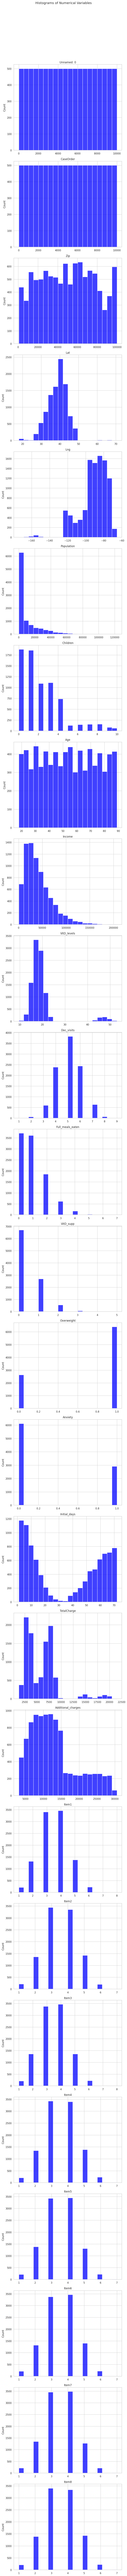

In [ ]:
# Create histograms for all numerical columns
num_plots = len(numerical_columns.columns)
fig, axes = plt.subplots(nrows=num_plots, ncols=1, figsize=(8, 6*num_plots))

for i, column in enumerate(numerical_columns.columns):
    sns.histplot(data=numerical_columns, x=column, bins=20, ax=axes[i], color='blue')
    axes[i].set_title(column)
    axes[i].set_xlabel(None)  # Remove individual x-labels to avoid overlapping

plt.suptitle("Histograms of Numerical Variables", y=1.02)
plt.subplots_adjust(hspace=0.5)  # Adjust vertical spacing between subplots
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


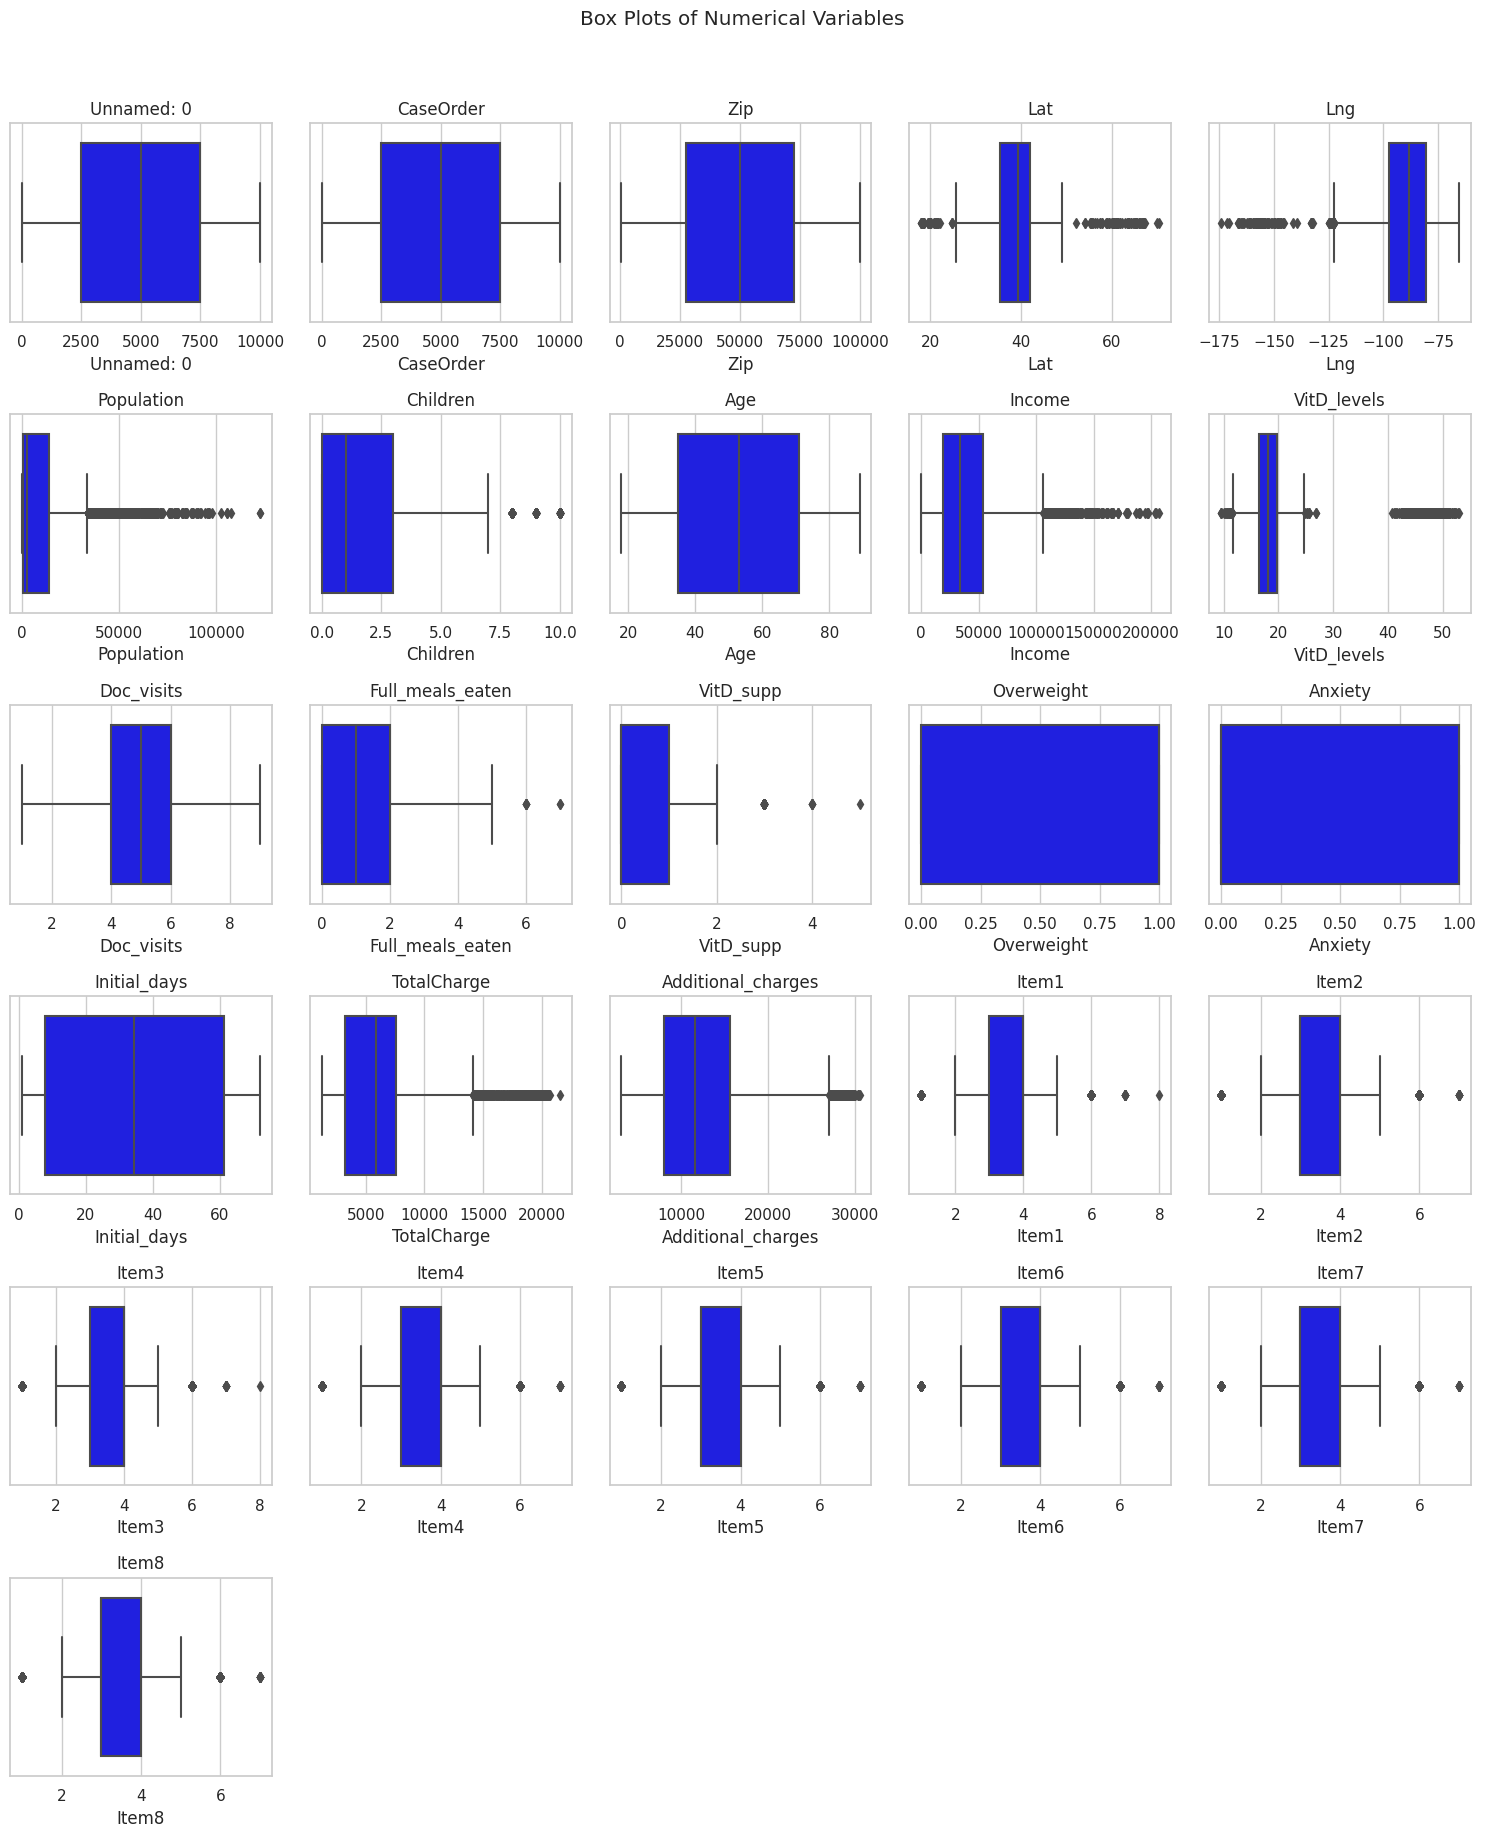

In [ ]:
# Number of numerical columns and columns per row
num_columns = len(numerical_columns.columns)
columns_per_row = 5  # Adjust the number of columns per row as needed

# Calculate the number of rows for the grid layout
num_rows = (num_columns + columns_per_row - 1) // columns_per_row

# Create box plots for all numerical columns in a grid layout
fig, axes = plt.subplots(nrows=num_rows, ncols=columns_per_row, figsize=(15, 3*num_rows))

for i, column in enumerate(numerical_columns.columns):
    row_idx = i // columns_per_row
    col_idx = i % columns_per_row
    sns.boxplot(data=numerical_columns, x=column, ax=axes[row_idx, col_idx], color='blue' )
    axes[row_idx, col_idx].set_title(column)

# Remove any empty subplots
for i in range(num_columns, num_rows * columns_per_row):
    row_idx = i // columns_per_row
    col_idx = i % columns_per_row
    fig.delaxes(axes[row_idx, col_idx])

plt.suptitle("Box Plots of Numerical Variables", y=1.02)
plt.tight_layout()
plt.show()


##### **Categorical Plots**

Create a list of categorical columns

In [ ]:
#Check the data types of all columns
data_types = df.dtypes

categorical_columns = []
for column in df.columns:
    if data_types[column] == 'object':  # Check for 'object' data type
        unique_count = df[column].nunique()
        total_count = df[column].count()
        if unique_count < 0.5 * total_count:
            categorical_columns.append(column)

print("Categorical columns:")
print(categorical_columns)

# Drop 'Job' and 'County' from the list of categorical columns
#Removing because Job and County have too many unique results to display clearly
categorical_columns.remove('Job')
categorical_columns.remove('County')

Categorical columns:
['State', 'County', 'Area', 'Timezone', 'Job', 'Education', 'Employment', 'Marital', 'Gender', 'ReAdmis', 'Soft_drink', 'Initial_admin', 'HighBlood', 'Stroke', 'Complication_risk', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma', 'Services']


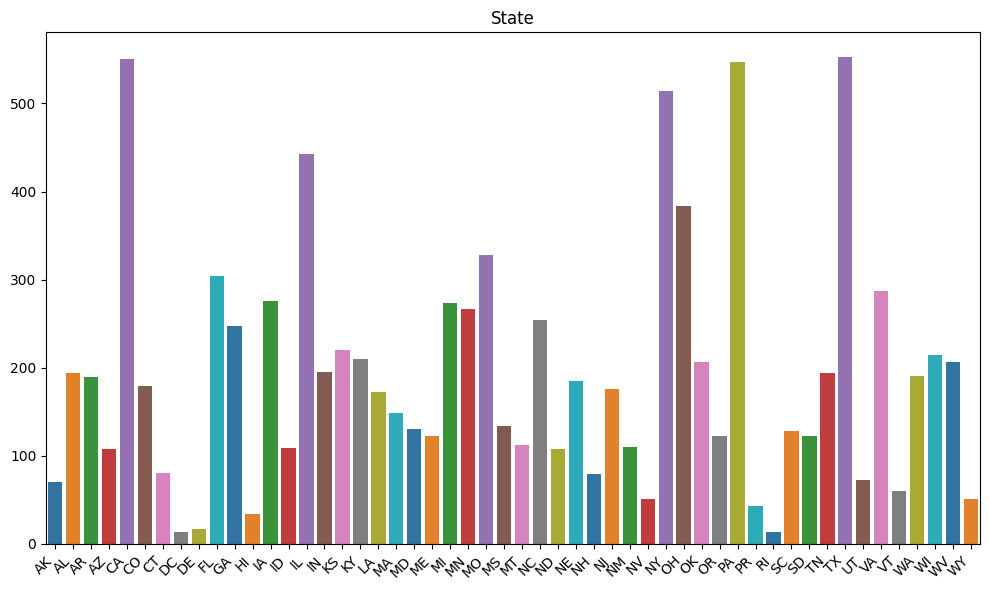

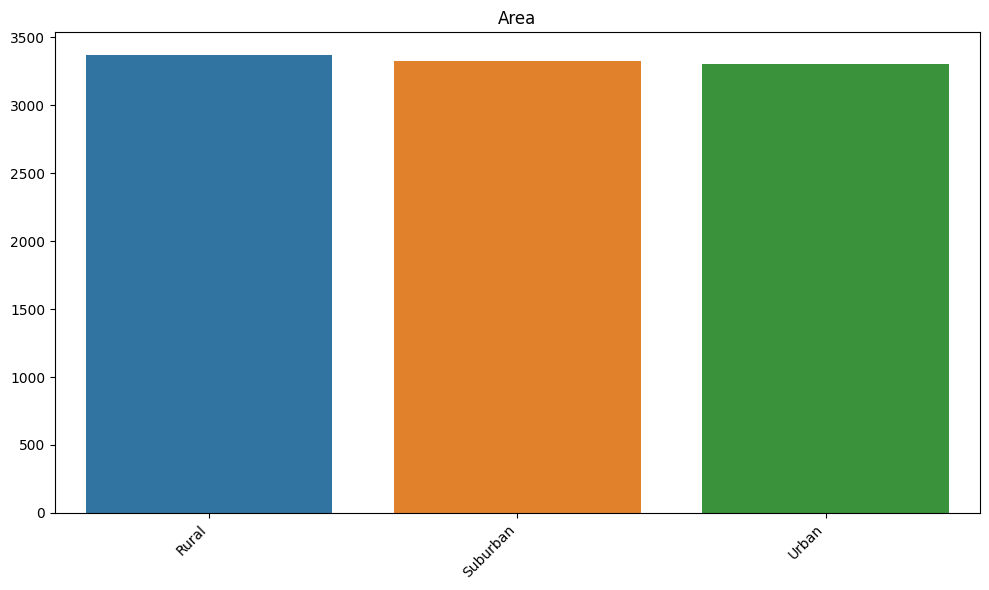

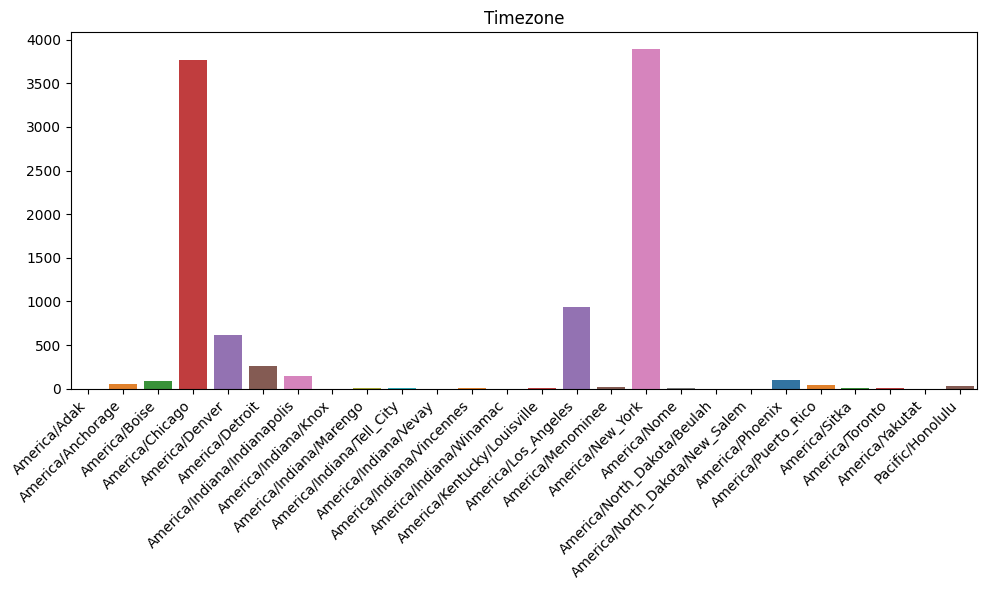

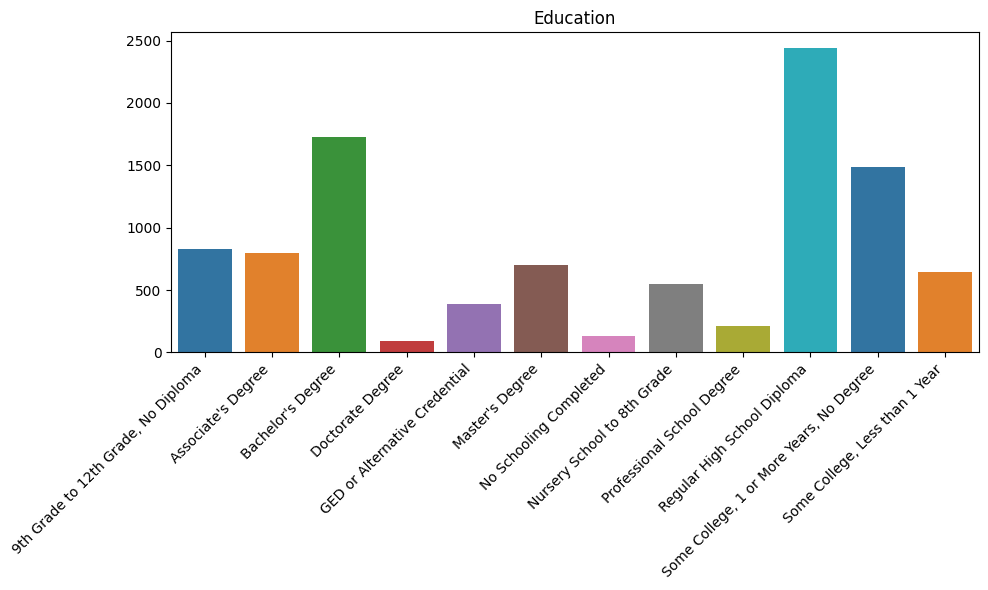

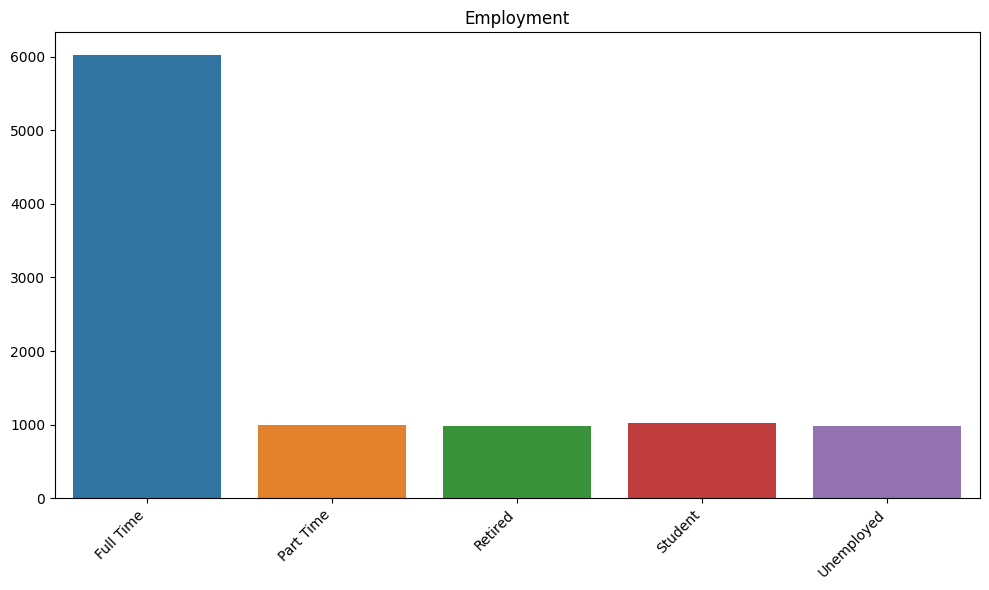

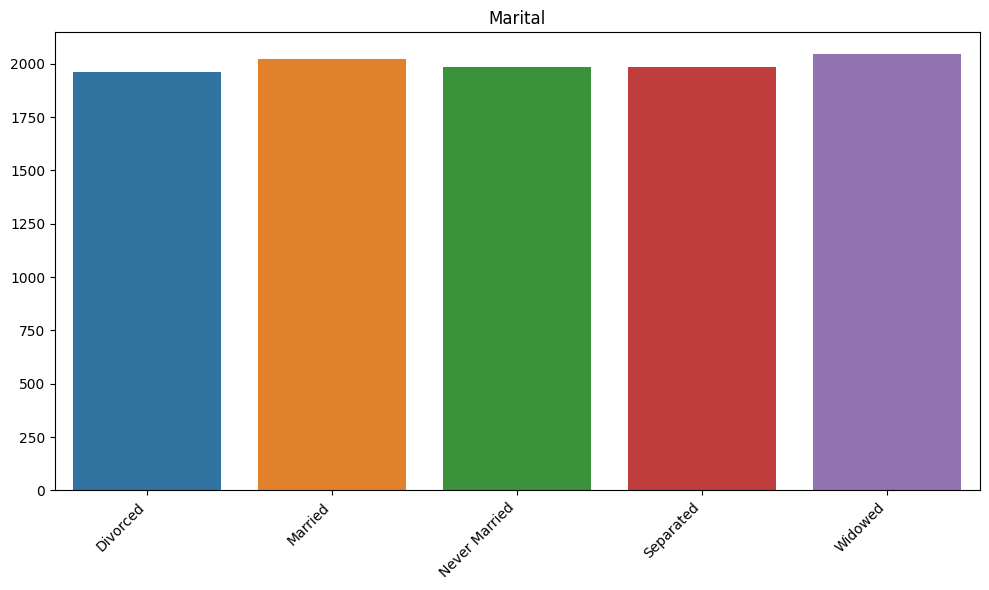

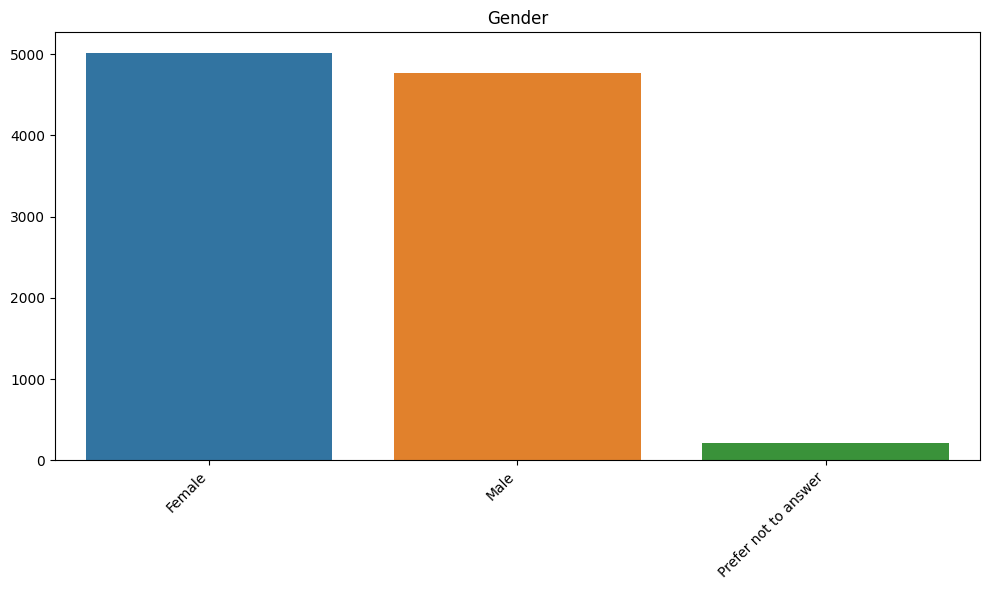

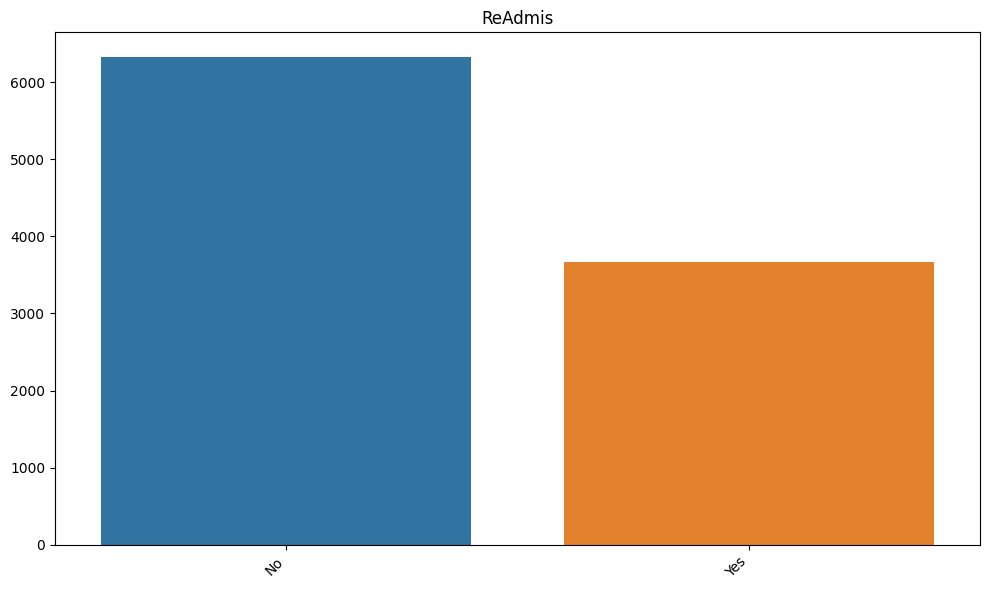

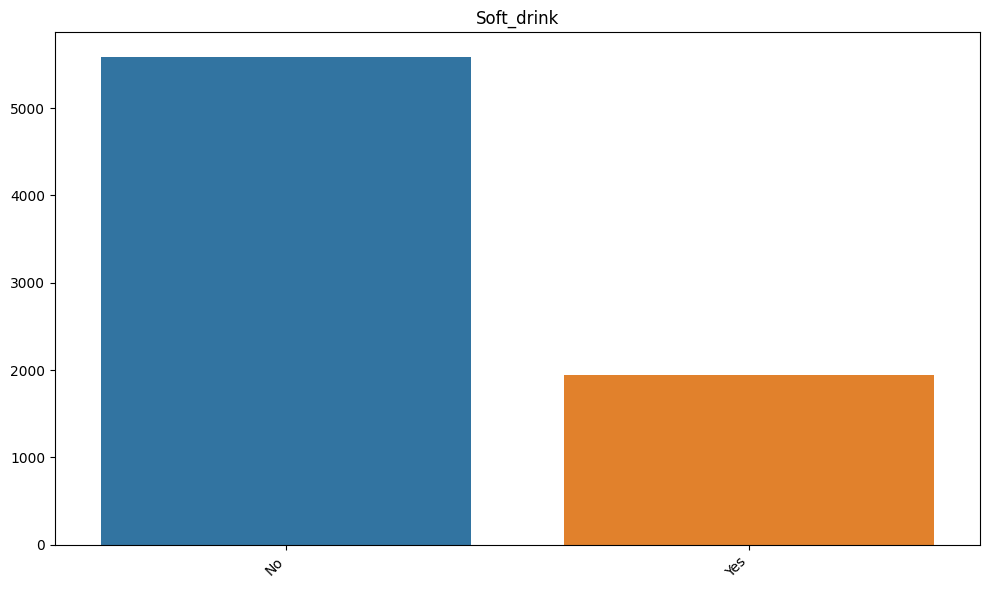

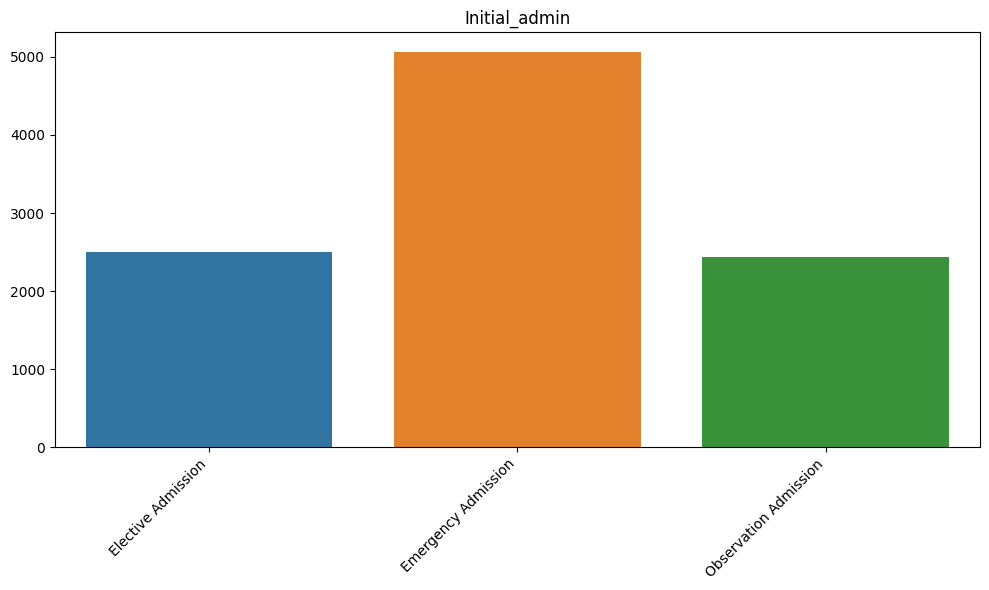

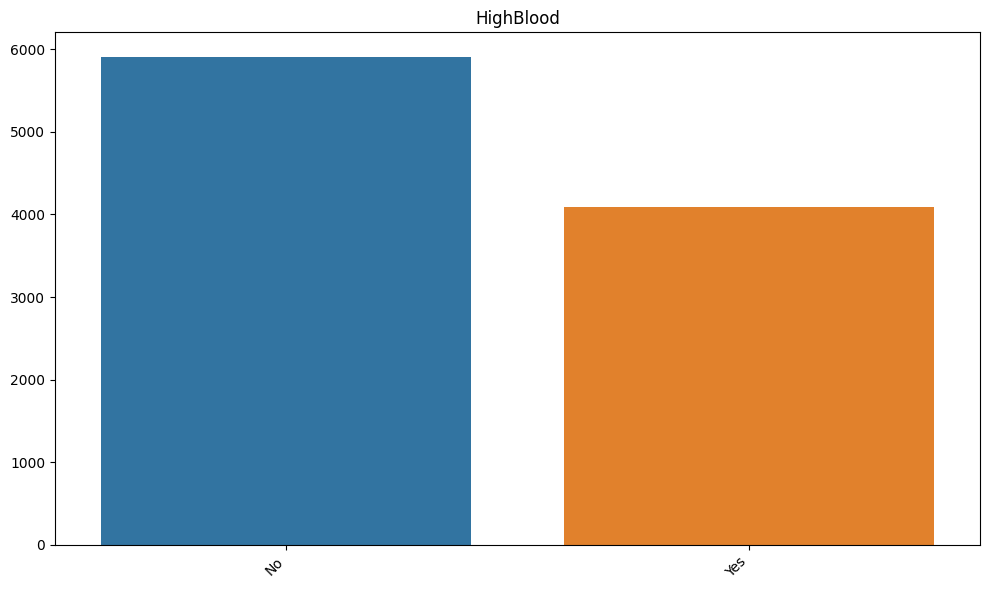

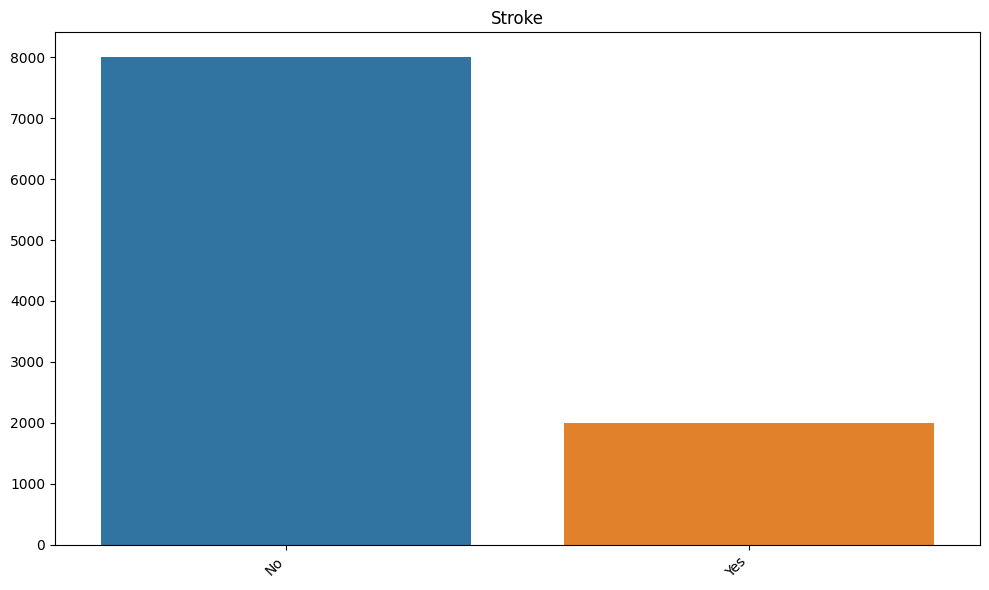

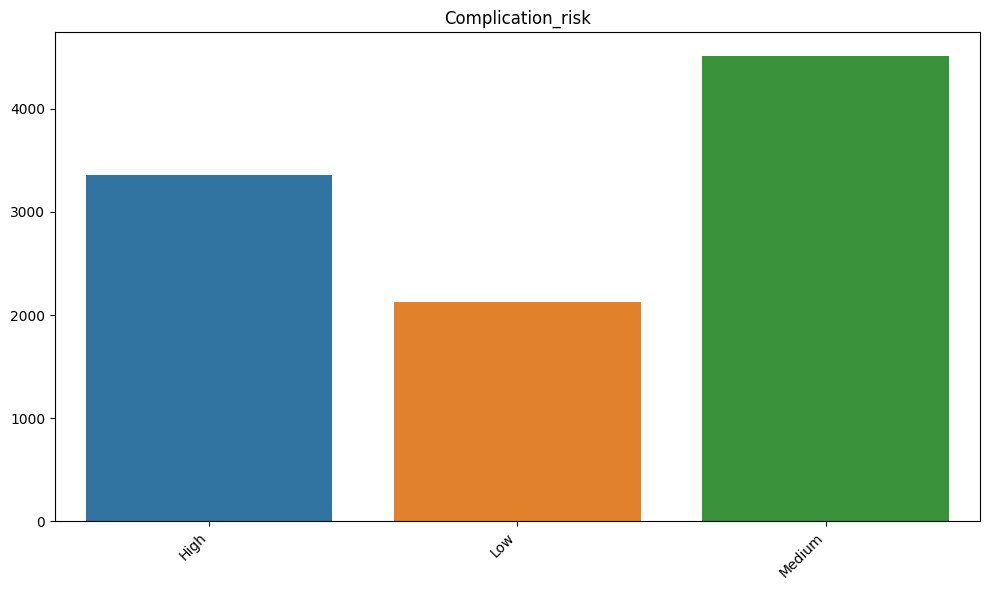

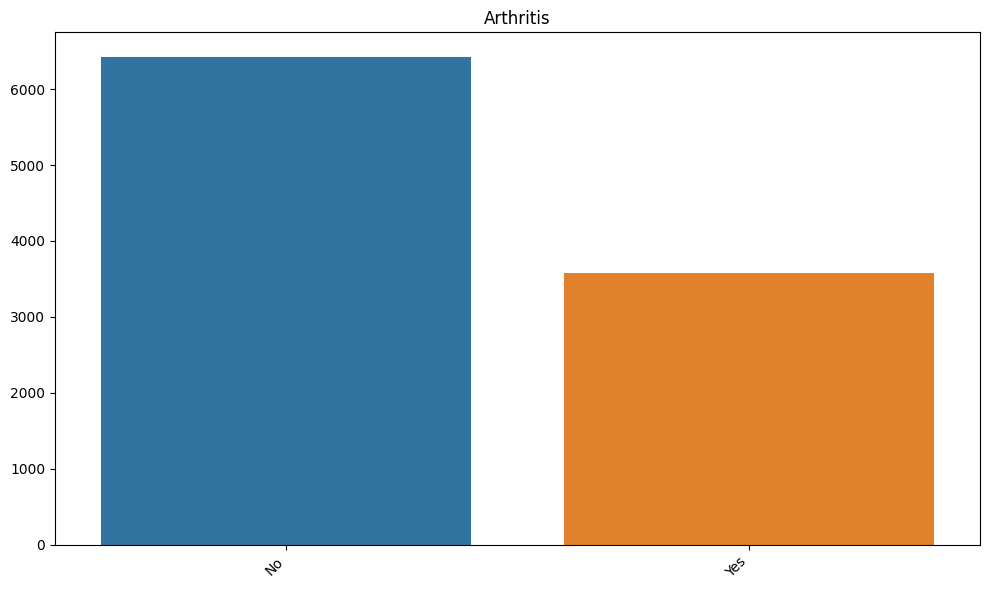

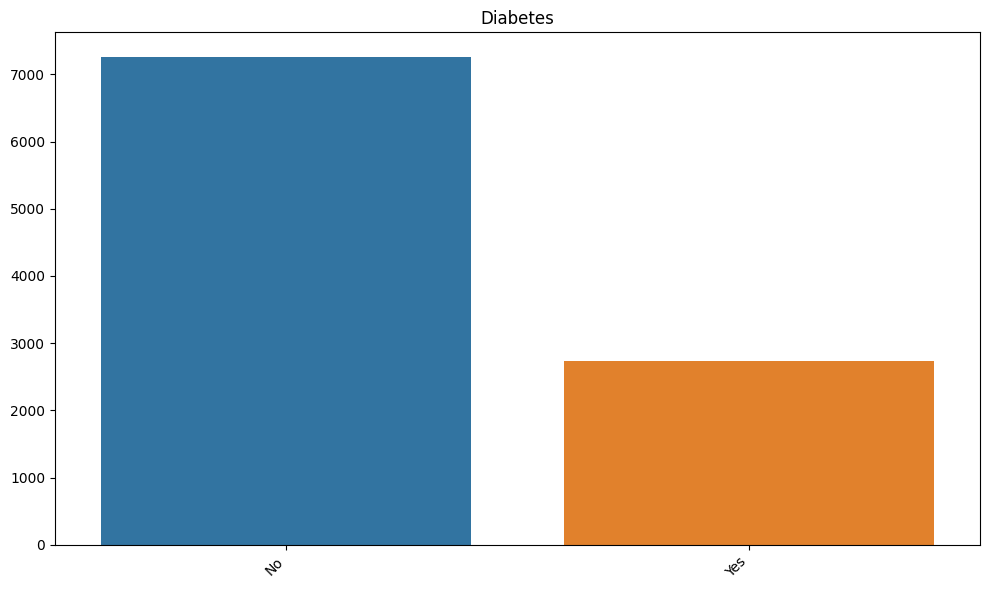

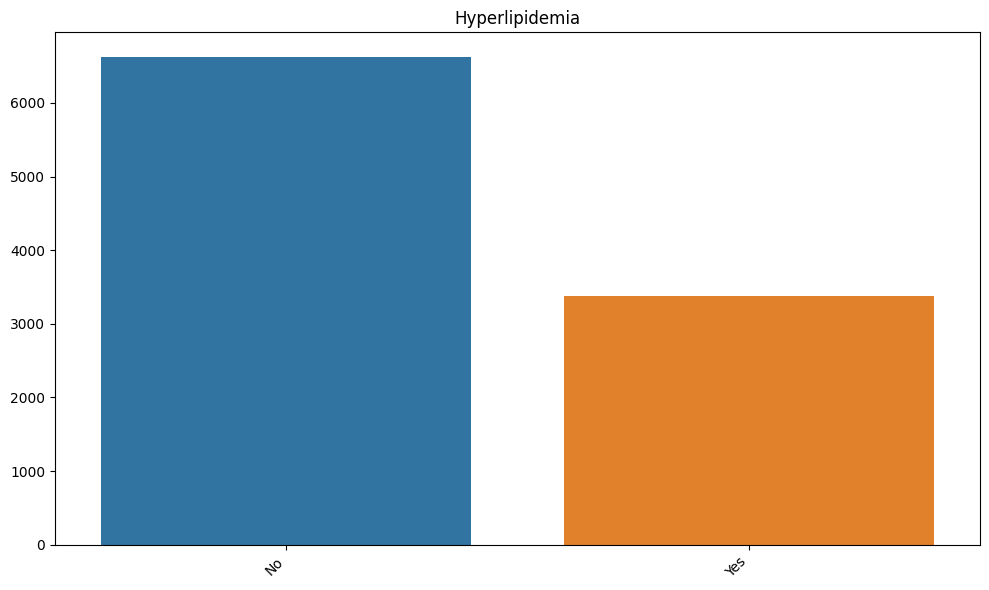

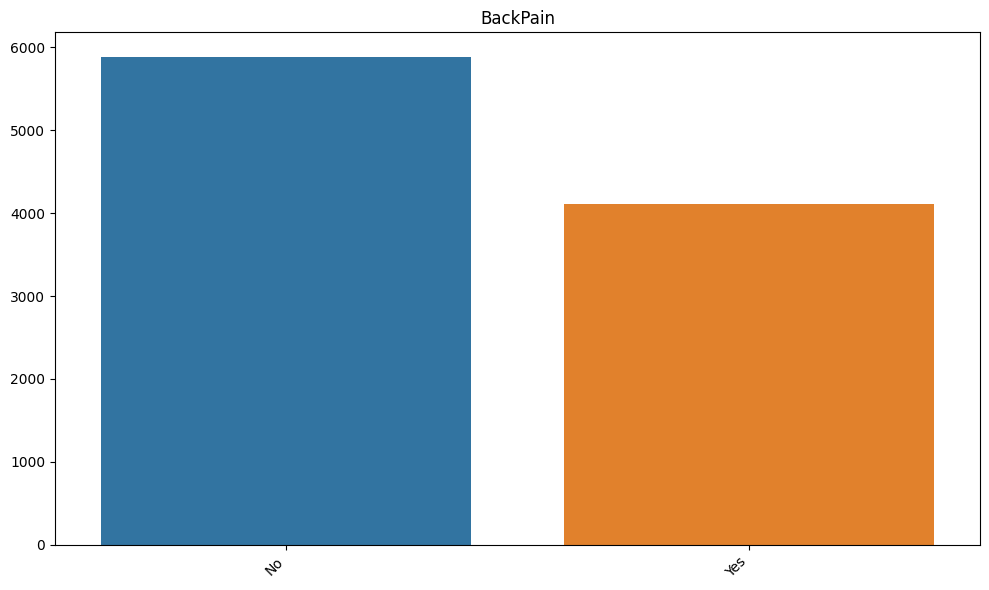

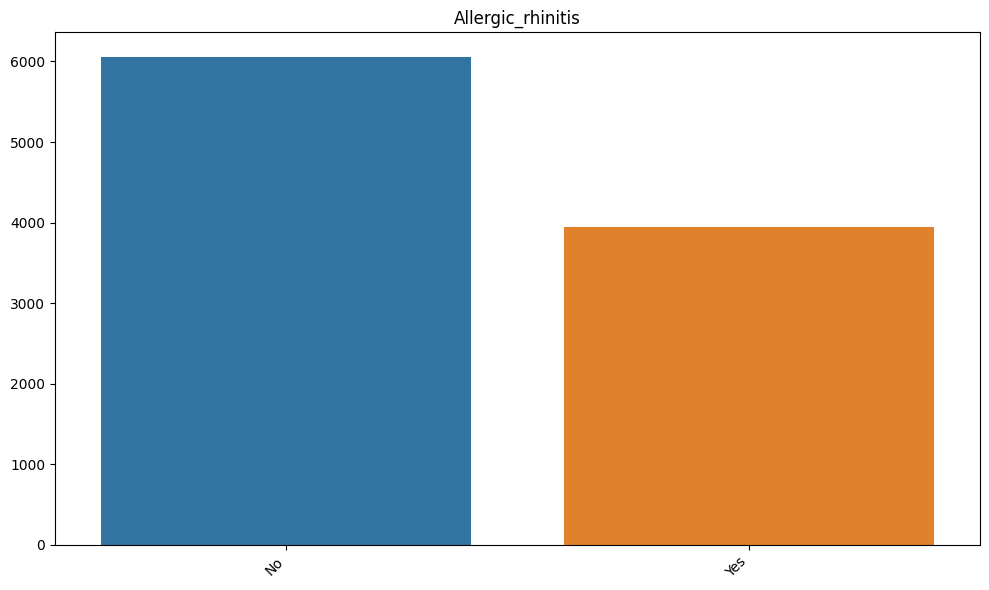

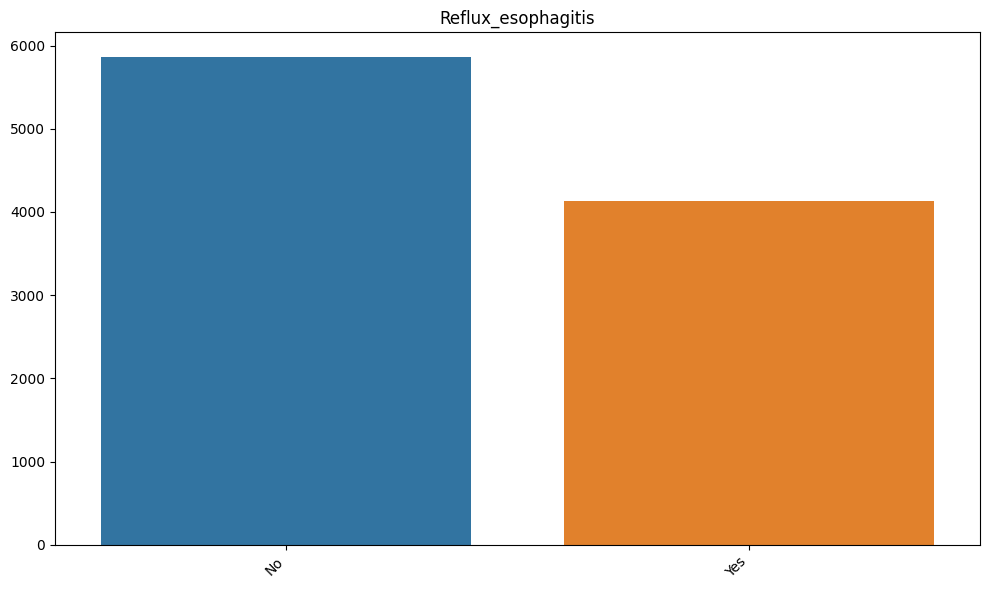

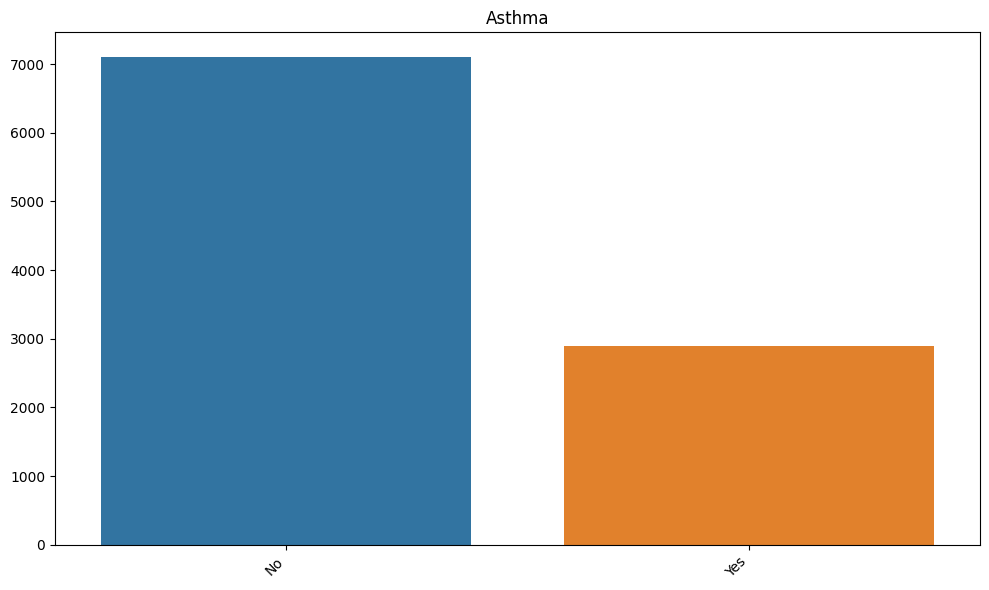

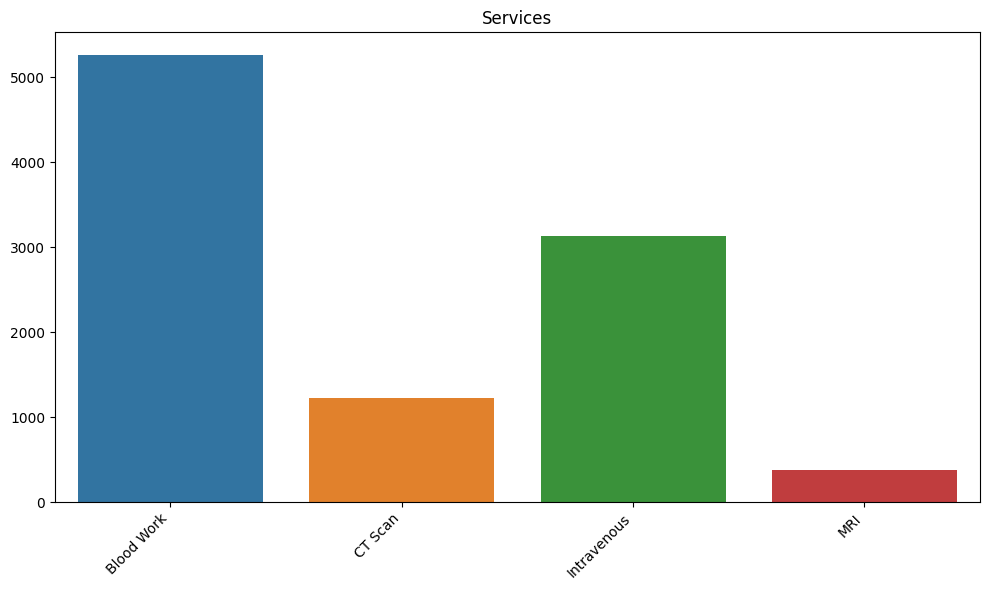

In [ ]:
# Convert specified columns to categorical data type
df[categorical_columns] = df[categorical_columns].astype('category')

# Create bar charts for each categorical variable
tab10_colors = sns.color_palette("tab10")  # Get the colors from the 'tab10' palette
for column in categorical_columns:
    plt.figure(figsize=(10, 6))  # Increase the figure size
    value_counts = df[column].value_counts()
    ax = sns.barplot(x=value_counts.index, y=value_counts.values, palette=tab10_colors)  # Use the 'tab10' colors
    ax.set_title(column)
    plt.xticks(rotation=45, ha='right')  # Rotate and align the x-axis labels
    plt.tight_layout()  # Adjust spacing
    plt.show()


##### **Missing Value Patterns**

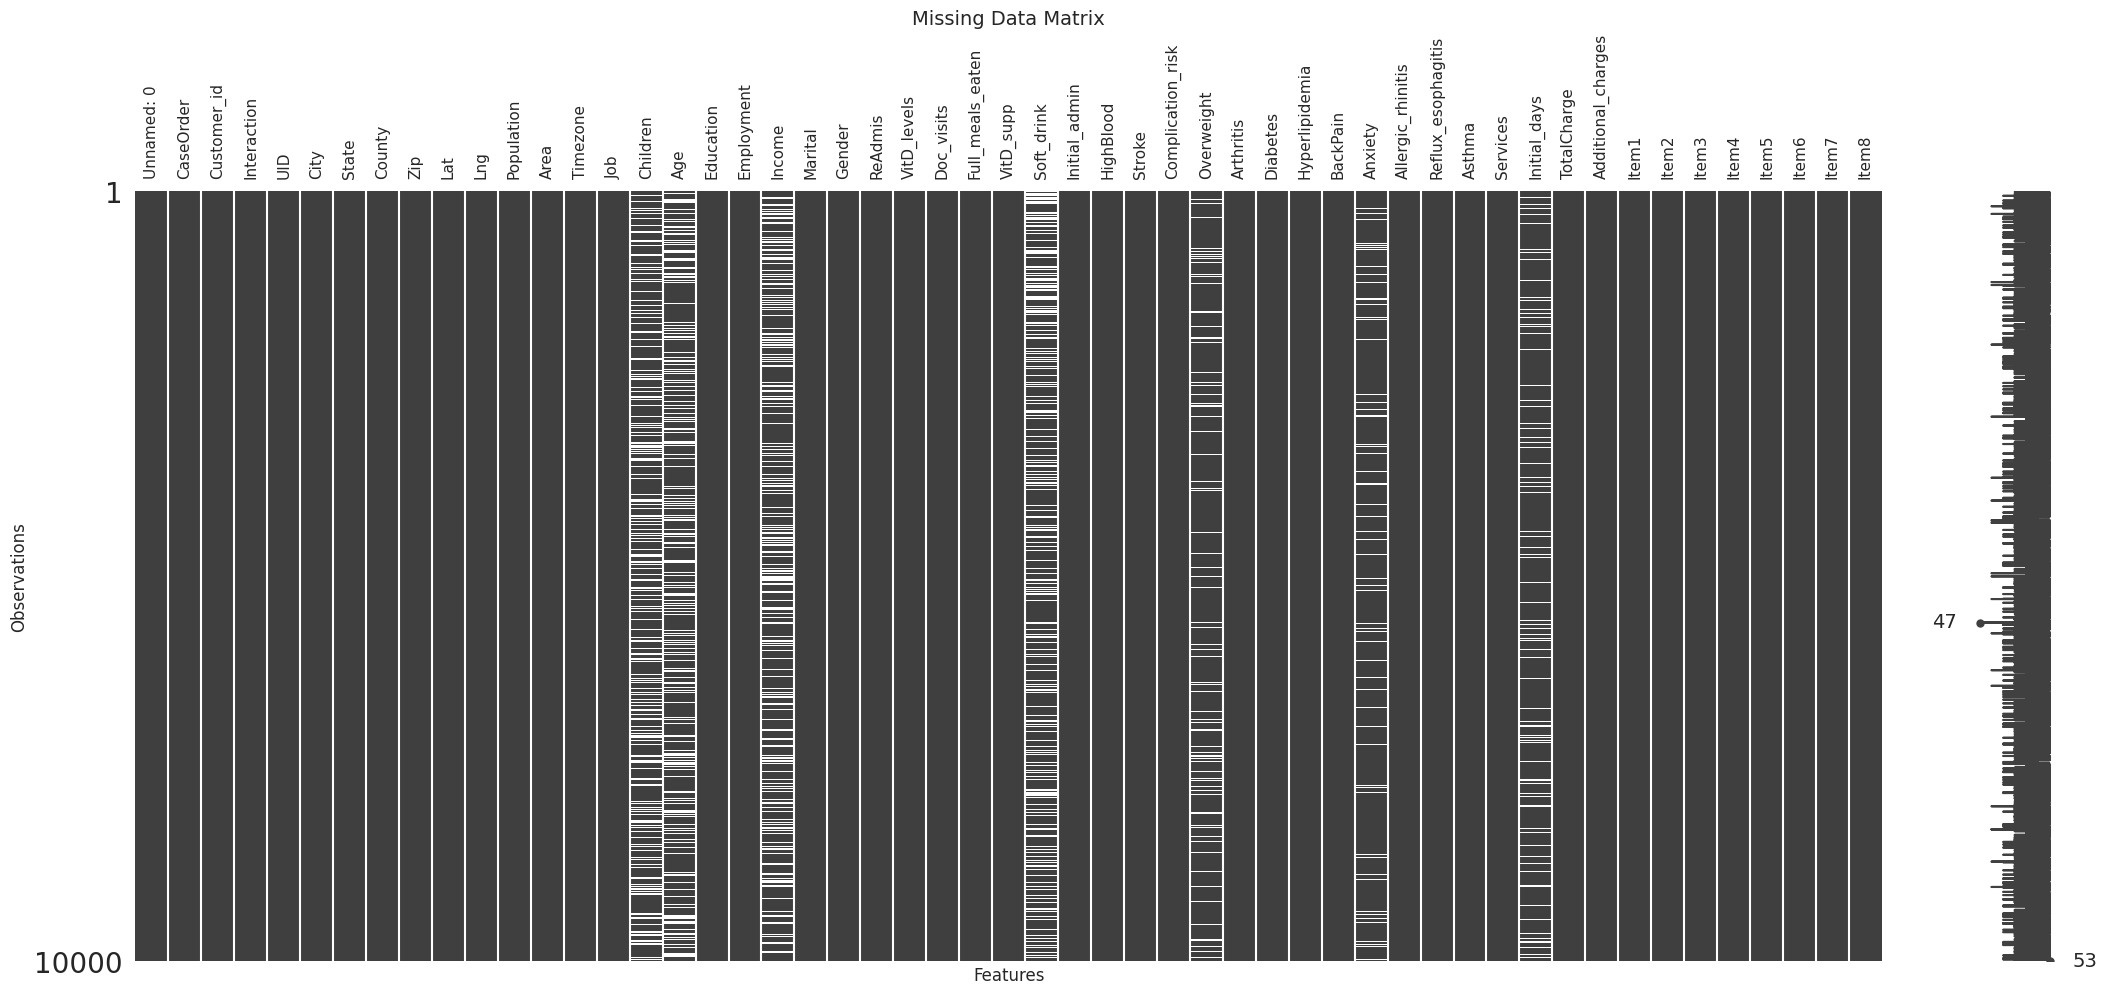

In [ ]:
matrix_plot = msno.matrix(df)

# Get the column labels (feature names)
column_labels = df.columns

plt.xlabel('Features', fontsize=12)
plt.ylabel('Observations', fontsize=12)
plt.title('Missing Data Matrix', fontsize=14)
plt.xticks(range(len(column_labels)), column_labels, rotation=90)  # Add x-axis tick labels

# Show the plot
plt.show()


<Axes: >

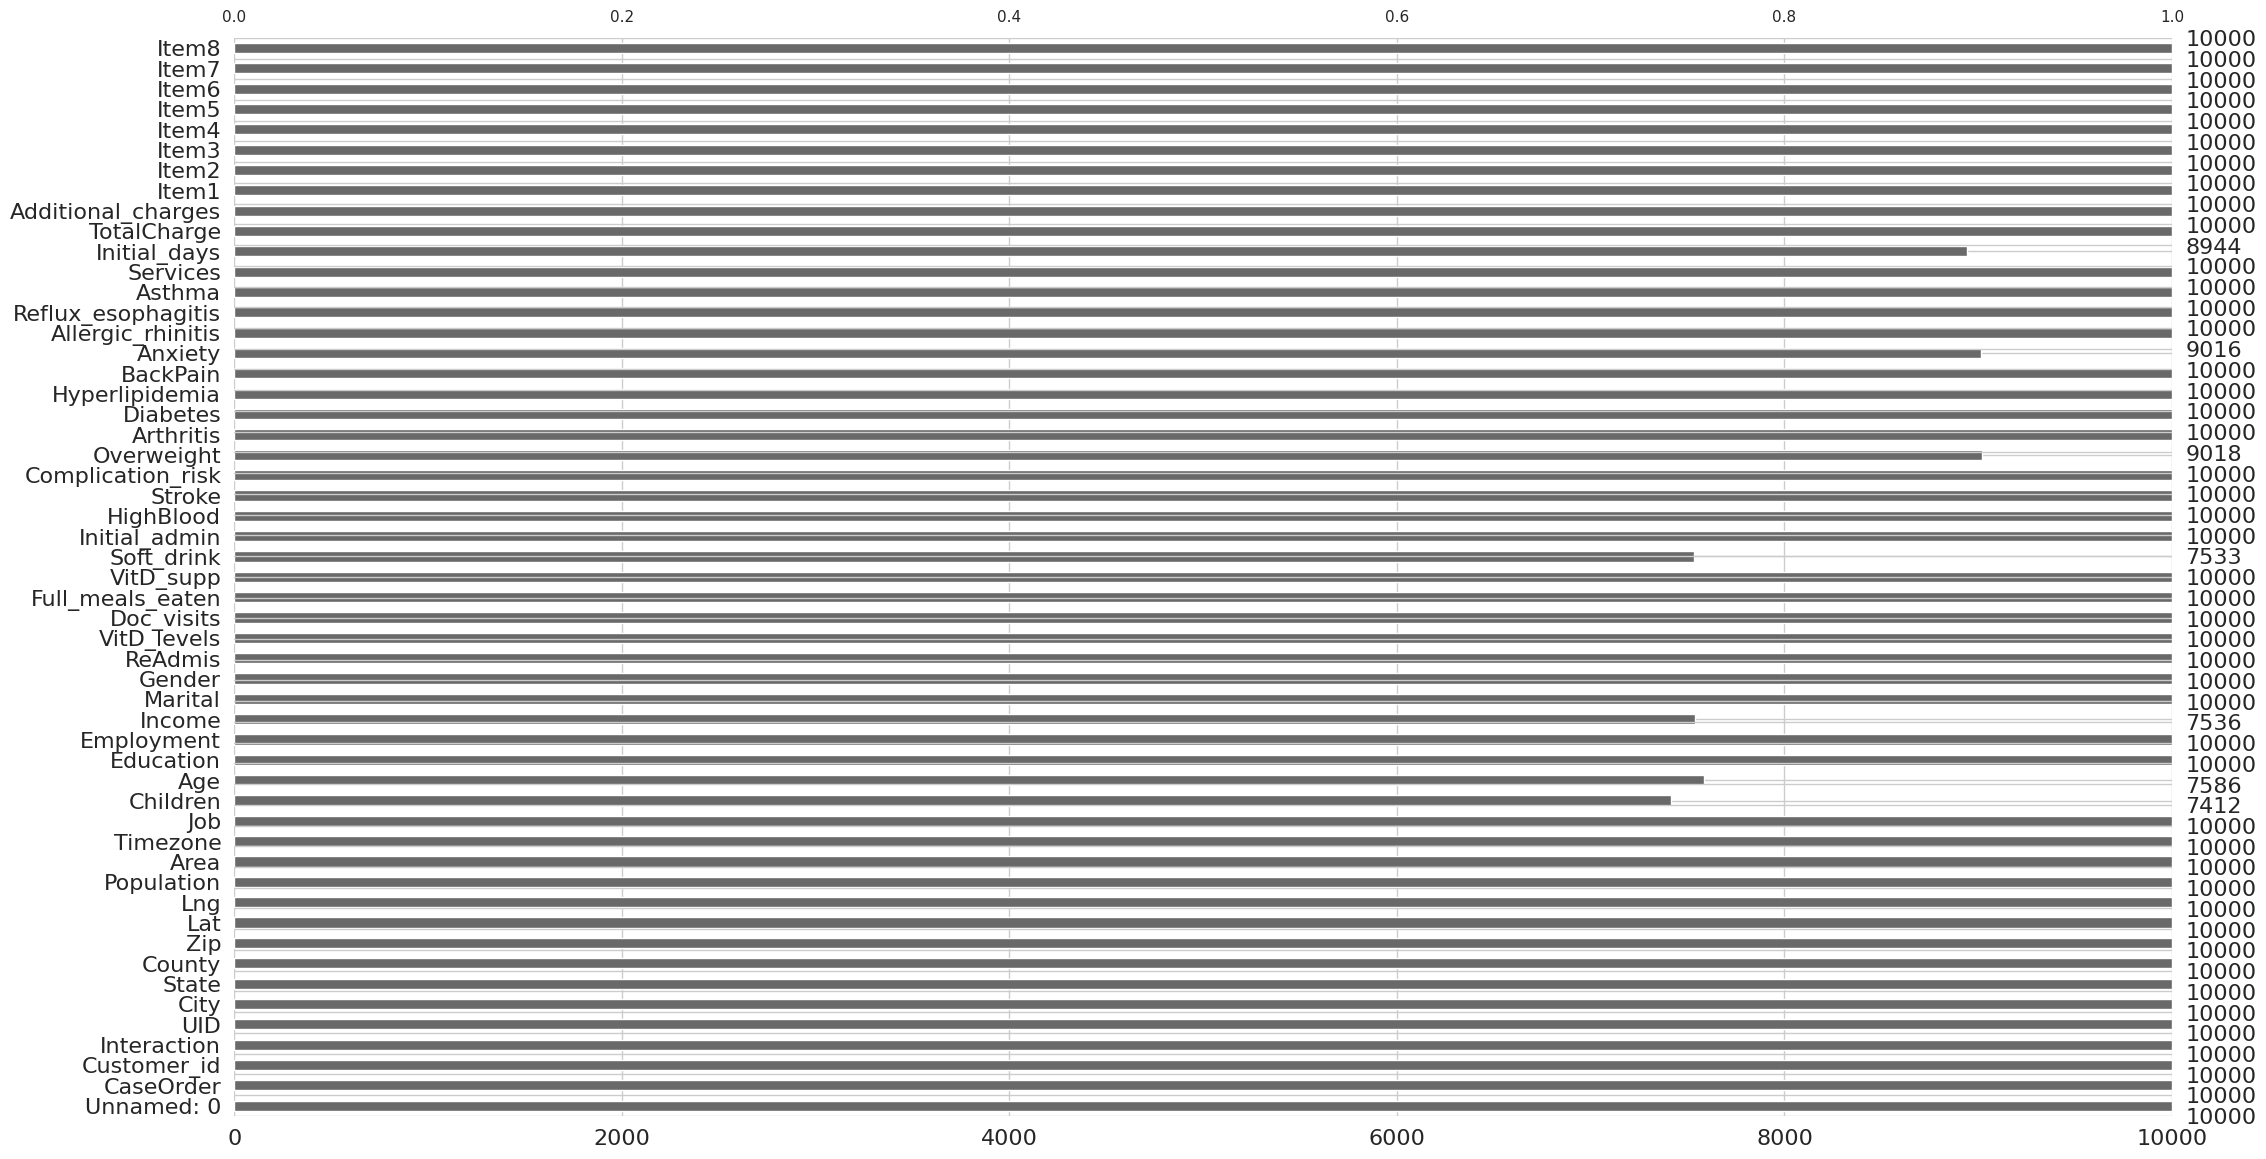

In [ ]:
msno.bar(df)      # Bar chart visualization


<Axes: >

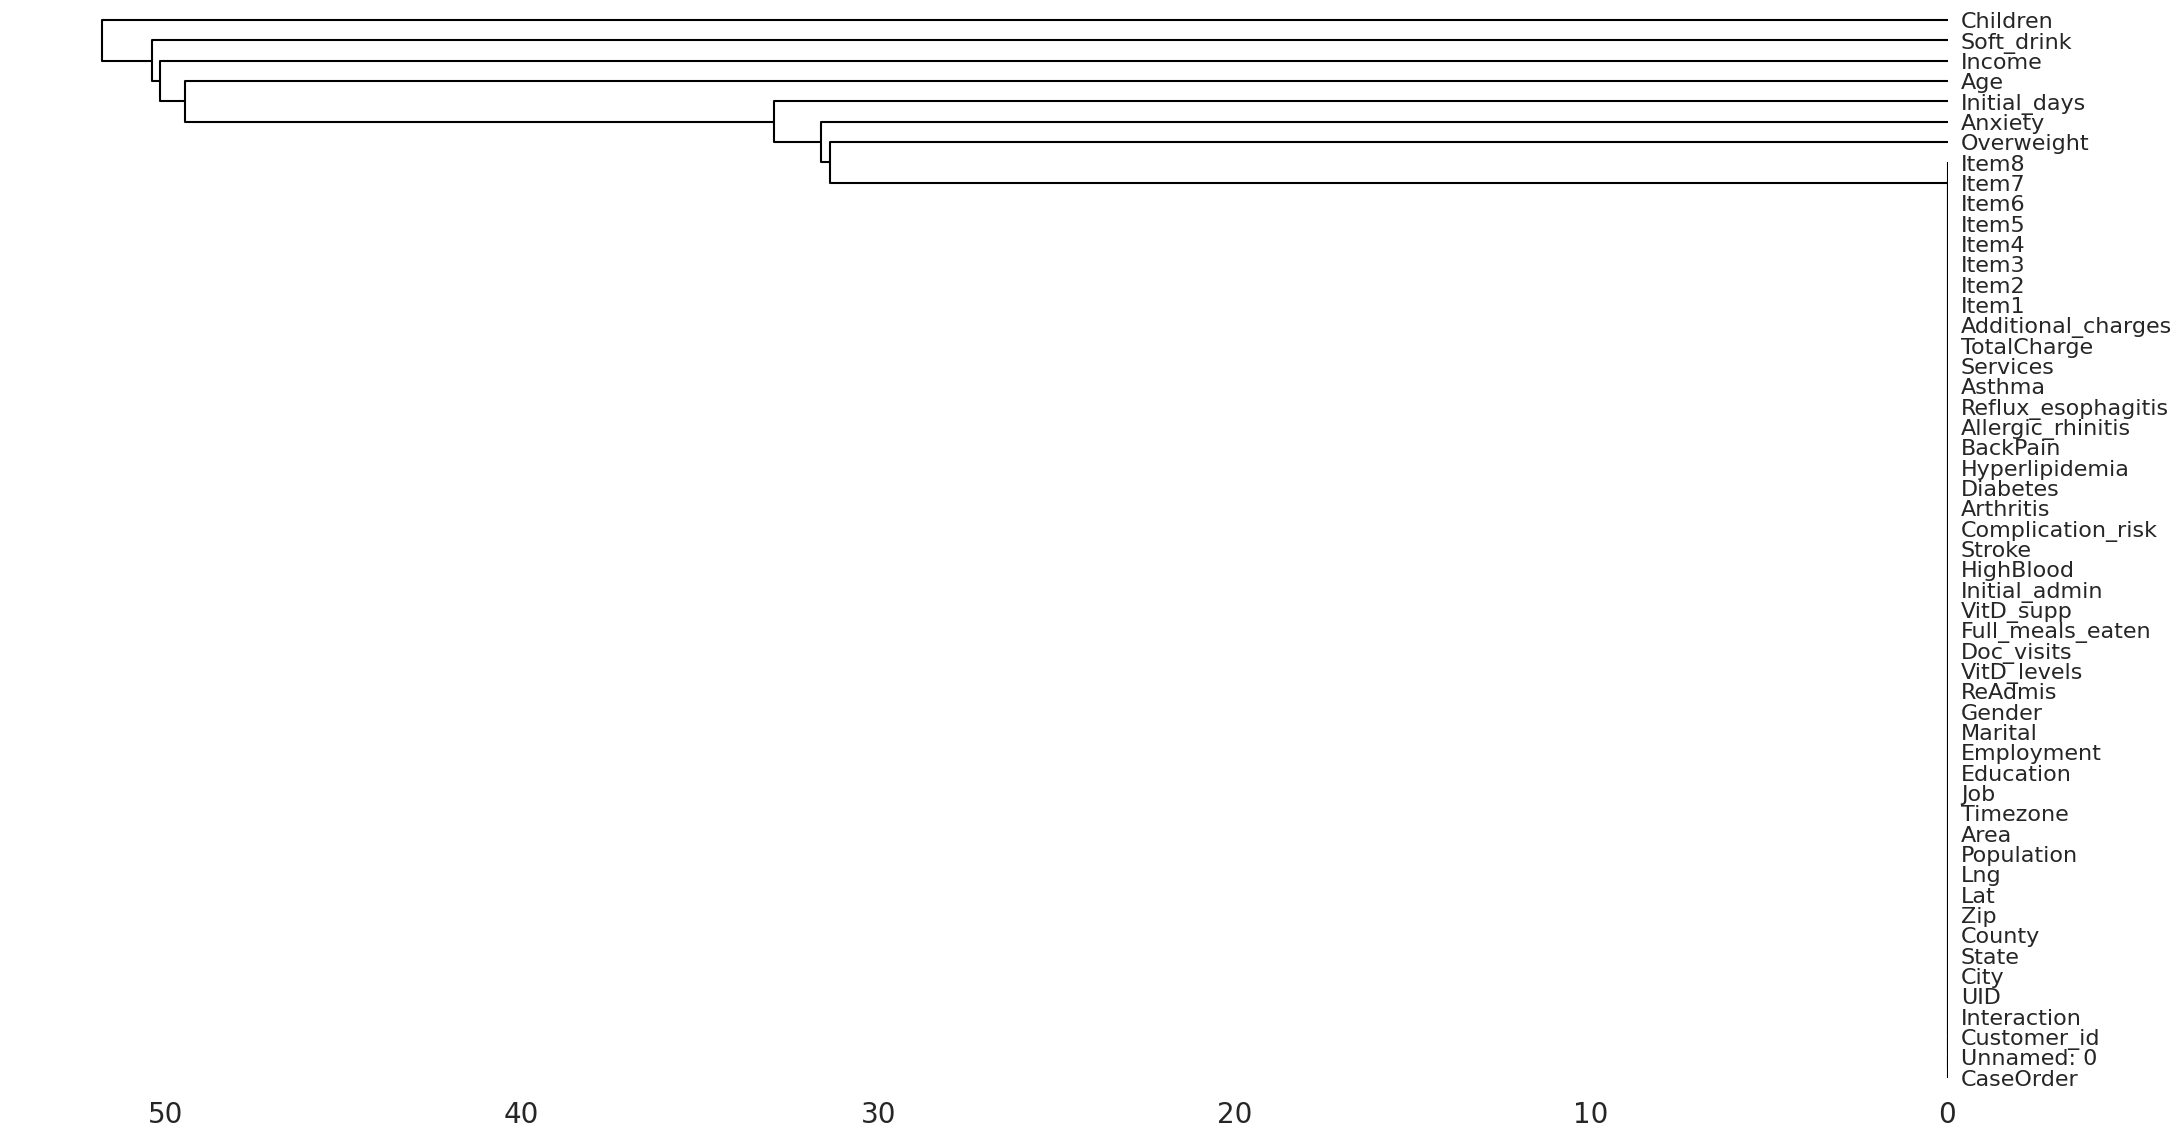

In [ ]:
#Identify the relationship of missing values between columns
msno.dendrogram(df, orientation='left')


Missing values are present in 7 different columns

In [ ]:
df.isna().sum()

Unnamed: 0               0
CaseOrder                0
Customer_id              0
Interaction              0
UID                      0
City                     0
State                    0
County                   0
Zip                      0
Lat                      0
Lng                      0
Population               0
Area                     0
Timezone                 0
Job                      0
Children              2588
Age                   2414
Education                0
Employment               0
Income                2464
Marital                  0
Gender                   0
ReAdmis                  0
VitD_levels              0
Doc_visits               0
Full_meals_eaten         0
VitD_supp                0
Soft_drink            2467
Initial_admin            0
HighBlood                0
Stroke                   0
Complication_risk        0
Overweight             982
Arthritis                0
Diabetes                 0
Hyperlipidemia           0
BackPain                 0
A

**Columns with missing values**

| Category      | Count     |
|---------------|-----------|
| Children      | 2588      |
| Age           | 2414      |
| Income        | 2464      |
| Soft_drink    | 2467      |
| Overweight    | 982       |
| Anxiety       | 984       |
| Initial_days  | 1056      |


**Checking how many rows have missing values**

In [ ]:
# Check for rows with missing values
rows_with_missing_values = df[df.isnull().sum(axis=1) > 0]

count_missing_values = df.isnull().any(axis=1).sum()

print("Count of rows with missing values:", count_missing_values)

total_rows = df.shape[0]

# Calculate the percentage of rows with missing values
percentage_missing_values = (count_missing_values / total_rows) * 100

print("Percentage of rows with missing values:", percentage_missing_values, "%")

Count of rows with missing values: 7687
Percentage of rows with missing values: 76.87 %


**Checking how many rows have more than one missing value**

In [ ]:
# Check for rows with multiple missing values
rows_with_two_or_more_missing = df[df.isnull().sum(axis=1) >= 2]
rows_with_three_or_more_missing = df[df.isnull().sum(axis=1) >= 3]
rows_with_four_or_more_missing = df[df.isnull().sum(axis=1) >= 4]
rows_with_five_or_more_missing = df[df.isnull().sum(axis=1) >= 5]
rows_with_six_or_more_missing = df[df.isnull().sum(axis=1) >= 6]
rows_with_seven_or_more_missing = df[df.isnull().sum(axis=1) >= 7]

# Get count of rows with two or more missing values
count_rows_with_two_or_more_missing = len(df[df.isnull().sum(axis=1) >= 2])

# Get count of rows with three or more missing values
count_rows_with_three_or_more_missing = len(df[df.isnull().sum(axis=1) >= 3])

# Get count of rows with four or more missing values
count_rows_with_four_or_more_missing = len(df[df.isnull().sum(axis=1) >= 4])

# Get count of rows with five or more missing value
count_rows_with_five_or_more_missing = len(df[df.isnull().sum(axis=1) >= 5])

# Get count of rows with six or more missing value
count_rows_with_six_or_more_missing = len(df[df.isnull().sum(axis=1) >= 6])

# Get count of rows with five or more missing value
count_rows_with_seven_or_more_missing = len(df[df.isnull().sum(axis=1) >= 7])


print("Count of rows with two or more missing values:", count_rows_with_two_or_more_missing)
print("Count of rows with three or more missing values:", count_rows_with_three_or_more_missing)
print("Count of rows with four or more missing values:", count_rows_with_four_or_more_missing)
print("Count of rows with five or more missing values:", count_rows_with_five_or_more_missing)
print("Count of rows with six or more missing values:", count_rows_with_six_or_more_missing )
print("Count of rows with seven or more missing values:", count_rows_with_seven_or_more_missing)



Count of rows with two or more missing values: 3789
Count of rows with three or more missing values: 1219
Count of rows with four or more missing values: 237
Count of rows with five or more missing values: 22
Count of rows with six or more missing values: 1
Count of rows with seven or more missing values: 0


**Inspecting rows with 5 or more missing values**

In [ ]:
rows_with_five_or_more_missing

,Unnamed: 0,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,VitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
192,193,193,P165814,6fa35d15-2c60-4250-8e04-ab36c9d810ba,7e61fbd0b029abbbc81b59e0e5867987,Liberty Center,IN,Wells,46766,40.71204,-85.28477,865,Suburban,America/Indiana/Indianapolis,Sports coach,NaN,NaN,Regular High School Diploma,Full Time,NaN,Divorced,Female,No,19.517493,5,1,0,NaN,Emergency Admission,Yes,No,Medium,1.0,Yes,No,No,No,NaN,Yes,No,Yes,Intravenous,1.028205,2472.817655,22040.917470,3,4,4,5,4,3,4,4
292,293,293,U325503,3908e8c3-8453-4197-b47d-cfebfc30e348,db6d501f4135c61326945dbe705da6e3,Peytona,WV,Boone,25154,38.11700,-81.70497,582,Rural,America/New_York,Trade union research officer,NaN,NaN,"Some College, 1 or More Years, No Degree",Full Time,NaN,Married,Male,No,14.251164,7,0,0,NaN,Emergency Admission,Yes,Yes,Medium,1.0,Yes,No,Yes,Yes,NaN,Yes,No,Yes,Blood Work,26.094601,4964.499903,16895.368300,3,3,3,4,3,4,4,4
1177,1178,1178,F979938,792c513b-6a26-4296-9392-eb16b970a5da,5d6e4b04462b2131bbc993a1ab115ba6,Grand Junction,CO,Mesa,81506,39.11585,-108.53246,11799,Suburban,America/Denver,"Engineer, electrical",NaN,NaN,"Some College, 1 or More Years, No Degree",Student,NaN,Never Married,Female,No,19.338186,4,0,1,NaN,Observation Admission,No,No,Low,1.0,No,Yes,Yes,No,NaN,No,No,No,Intravenous,13.673667,3620.379709,7324.539487,2,2,2,4,2,4,3,3
1215,1216,1216,F54388,62c1ea6d-3913-438e-872f-9f8d51bcbf1f,a4d849951263a259d1d18aaab7f3c702,Lewistown,PA,Mifflin,17044,40.57840,-77.59430,21047,Suburban,America/New_York,"Teacher, secondary school",1.0,NaN,Associate's Degree,Full Time,826.01,Separated,Male,No,19.455420,2,0,0,NaN,Elective Admission,No,Yes,Low,NaN,No,No,Yes,No,NaN,No,No,Yes,Blood Work,NaN,3201.958286,5986.913483,4,4,3,3,4,2,5,2
1989,1990,1990,W646888,33faddfa-d4cb-40a8-802b-985fcac39e8b,a19e52d878627128cbe6462d28b30edc,West Newton,IN,Marion,46183,39.65280,-86.28160,15,Rural,America/Indiana/Indianapolis,"Scientist, biomedical",NaN,NaN,"Some College, 1 or More Years, No Degree",Full Time,NaN,Separated,Male,No,17.737772,8,0,0,No,Emergency Admission,No,Yes,High,1.0,No,Yes,No,No,NaN,Yes,No,No,Blood Work,NaN,3351.019270,6586.488870,5,4,5,3,4,4,3,2
2925,2926,2926,N691392,a73cf155-6b21-4415-aae8-ac2939862d9e,48e5392d0a06b109ed2cd29947e71297,Sadler,TX,Grayson,76264,33.73974,-96.83528,1508,Rural,America/Chicago,Homeopath,NaN,NaN,GED or Alternative Credential,Full Time,NaN,Married,Female,No,18.480603,5,2,0,No,Elective Admission,No,No,High,1.0,No,No,No,No,NaN,Yes,No,No,Intravenous,NaN,4005.349965,12776.266060,2,3,4,3,3,3,3,1
3718,3719,3719,C425801,42c6bf11-ed99-43ad-b8cd-3b62ac5ac0c5,b37d1b8e6fa302c947682f3f4d1ba49f,Marietta,GA,Cobb,30008,33.89630,-84.58925,31982,Rural,America/New_York,Photographer,4.0,NaN,Bachelor's Degree,Full Time,NaN,Divorced,Female,No,16.301610,6,2,0,NaN,Emergency Admission,No,No,Low,NaN,No,No,Yes,Yes,1.0,No,No,No,Blood Work,NaN,4104.078624,4389.512479,3,3,3,2,3,3,4,3
4014,4015,4015,X526907,033dfb05-fb84-4e37-b601-c45079d2c106,6a1c247257421c2b389253696450167b,Dixonville,PA,Indiana,15734,40.72485,-79.00127,467,Suburban,America/New_York,"Administrator, charities/voluntary organisations",1.0,NaN,"9th Grade to 12th Grade, No Diploma",Full Time,NaN,Widowed,Female,No,15.968003,4,0,0,NaN,Observation Admission,Yes,No,Medium,NaN,No,No,Yes,No,NaN,No,No,No,Intravenous,14.489697,2996.086015,21535.069150,4,3,3,4,4,3,4,4
4271,4272,4272,H662750,faf29a9a-e5f8-4c25-ab2c-3f786beb79ce,272ffe5b83f7a634c128573f31bef4a0,West York,IL,Crawford,62478,39.17838,-87.74266,389,Rural,America/Chicago,Insurance claims handler,NaN,NaN,"Some College, 1 or More Years, No D

**Getting value counts for columns with missing values**

In [ ]:
columns_to_check = ['Children', 'Age', 'Income', 'Soft_drink', 'Overweight', 'Anxiety', 'Initial_days']

# Get value counts for each specified column
for column in columns_to_check:
    value_counts = df[column].value_counts()
    print(f"{column}:\n{value_counts}\n")

Children:
0.0     1880
1.0     1858
3.0     1113
2.0     1094
4.0      739
8.0      157
7.0      154
6.0      145
5.0      126
9.0       83
10.0      63
Name: Children, dtype: int64

Age:
30.0    126
47.0    124
74.0    123
38.0    123
40.0    122
       ... 
75.0     90
82.0     90
63.0     90
51.0     89
36.0     85
Name: Age, Length: 72, dtype: int64

Income:
14572.40    2
37132.97    2
55506.92    2
20474.03    2
26915.85    2
           ..
35093.92    1
41900.29    1
13511.95    1
34015.88    1
62682.63    1
Name: Income, Length: 7531, dtype: int64

Soft_drink:
No     5589
Yes    1944
Name: Soft_drink, dtype: int64

Overweight:
1.0    6395
0.0    2623
Name: Overweight, dtype: int64

Anxiety:
0.0    6110
1.0    2906
Name: Anxiety, dtype: int64

Initial_days:
10.585770    1
64.630142    1
48.772686    1
67.036508    1
63.334689    1
            ..
9.216747     1
1.021594     1
10.261690    1
17.170461    1
70.850592    1
Name: Initial_days, Length: 8944, dtype: int64



**Checking summary statistics for columns with missing values**

In [ ]:
# Get summary statistics for the specified columns
summary_stats = df[columns_to_check].describe()
print(summary_stats)

          Children          Age         Income   Overweight      Anxiety  \
count  7412.000000  7586.000000    7536.000000  9018.000000  9016.000000   
mean      2.098219    53.295676   40484.438268     0.709137     0.322316   
std       2.155427    20.659182   28664.861050     0.454186     0.467389   
min       0.000000    18.000000     154.080000     0.000000     0.000000   
25%       0.000000    35.000000   19450.792500     0.000000     0.000000   
50%       1.000000    53.000000   33942.280000     1.000000     0.000000   
75%       3.000000    71.000000   54075.235000     1.000000     1.000000   
max      10.000000    89.000000  207249.130000     1.000000     1.000000   

       Initial_days  
count   8944.000000  
mean      34.432082  
std       26.287050  
min        1.001981  
25%        7.911709  
50%       34.446941  
75%       61.124654  
max       71.981486  


**Rechecking distribution for columns with missing values**

Income is left skewed.<br> The median should be used for imputation<br>
Initial Days has a bimodal distribution.

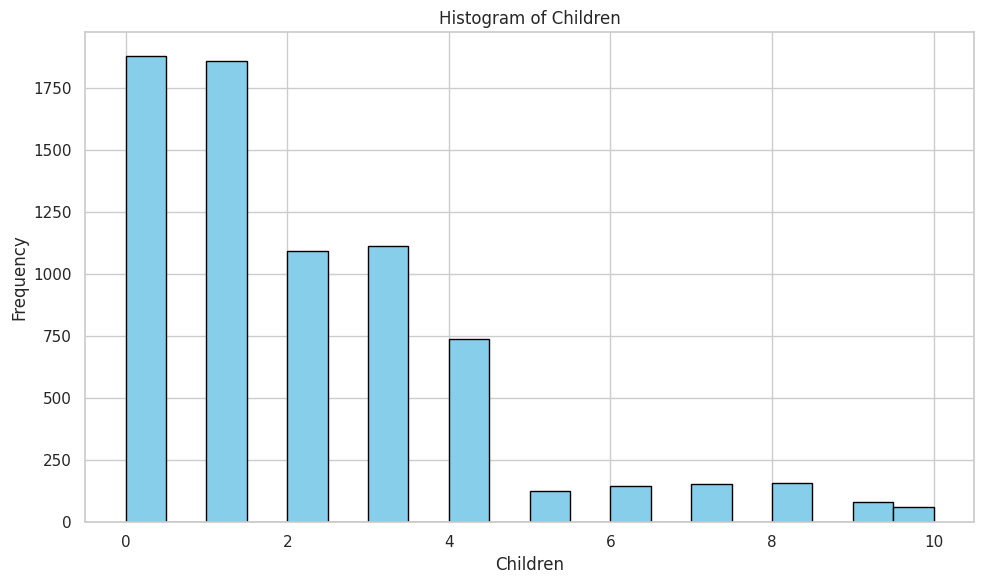

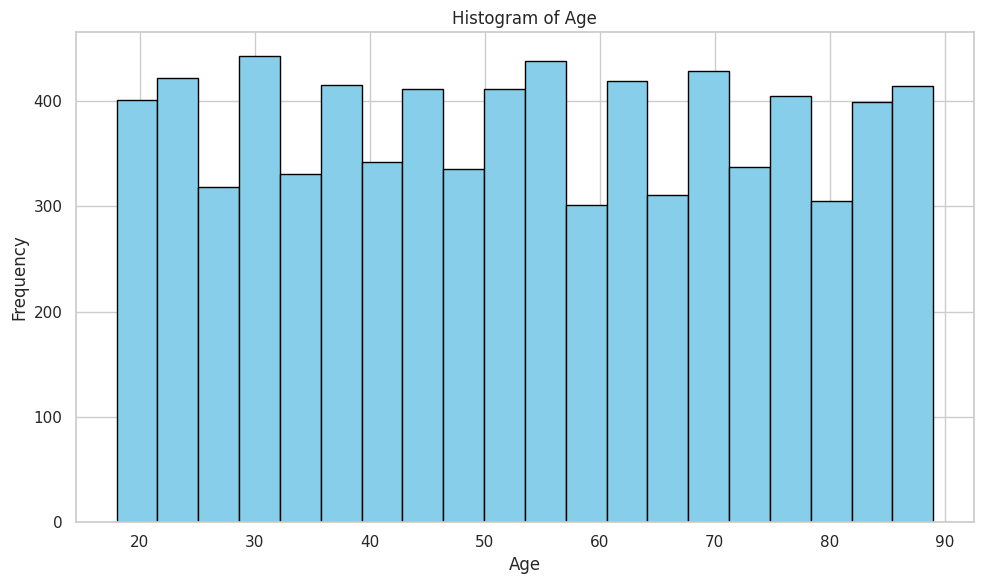

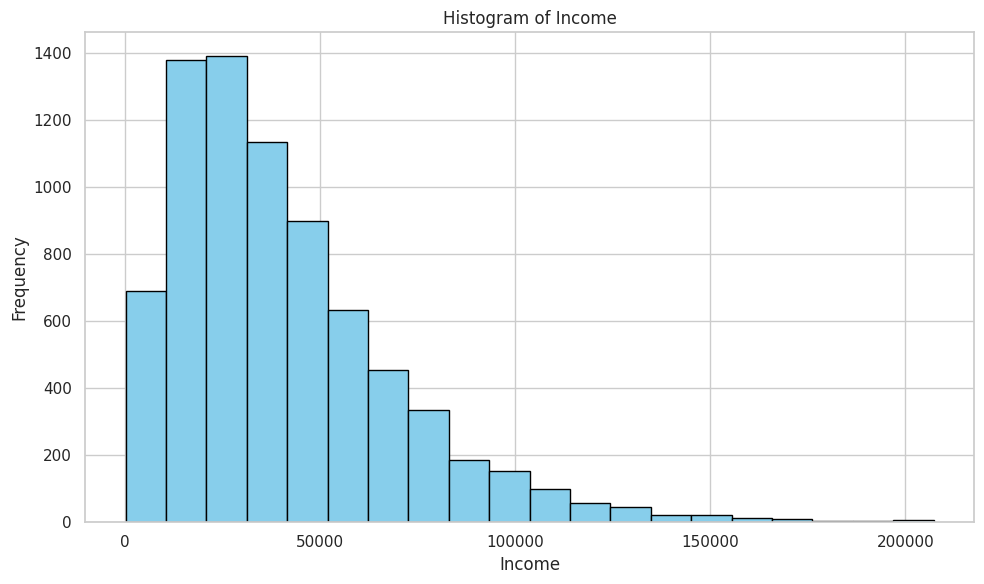

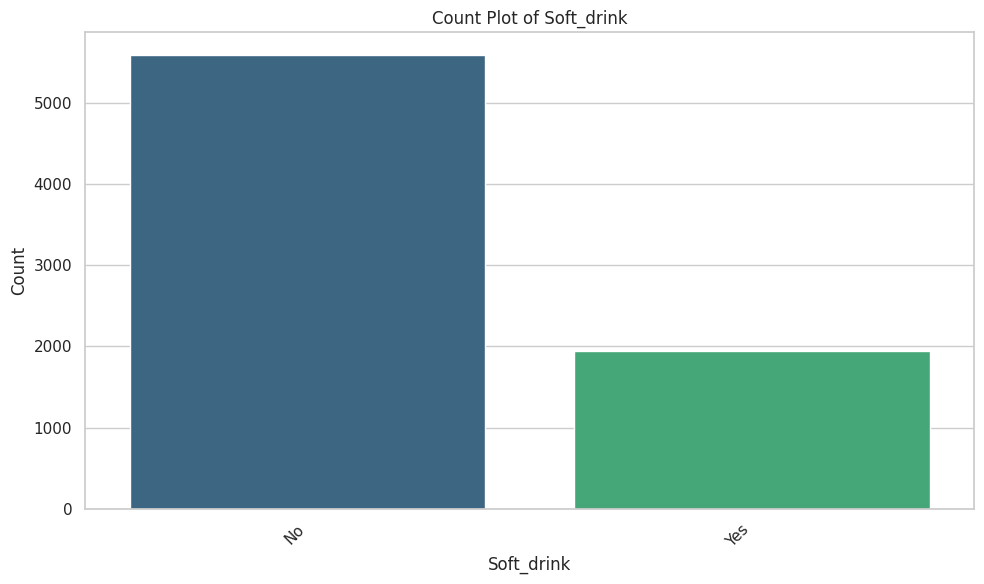

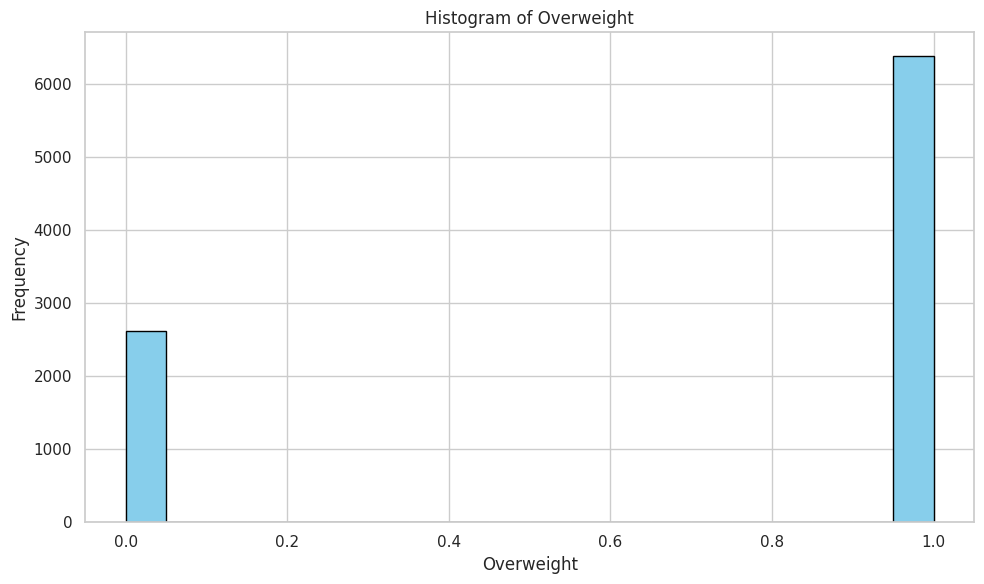

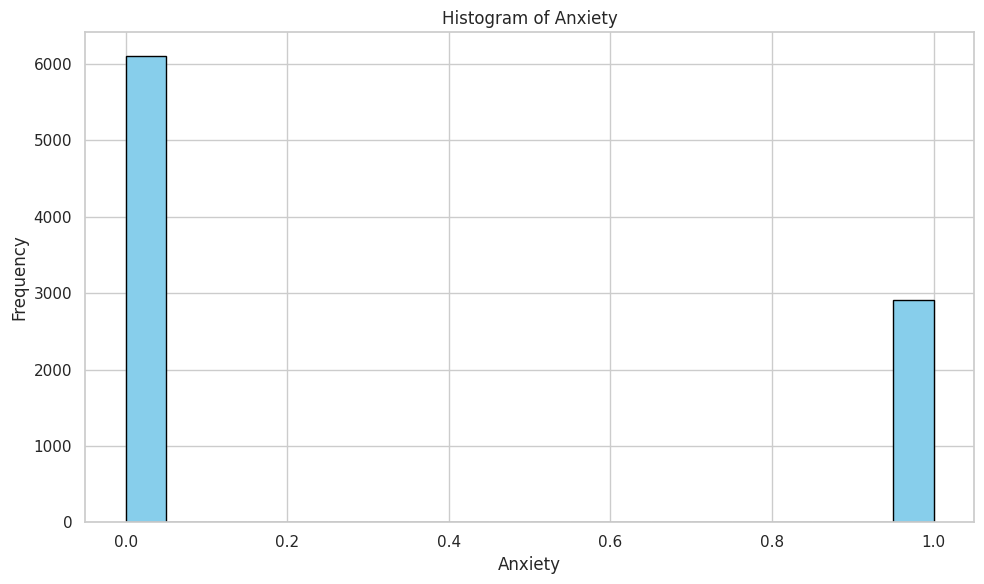

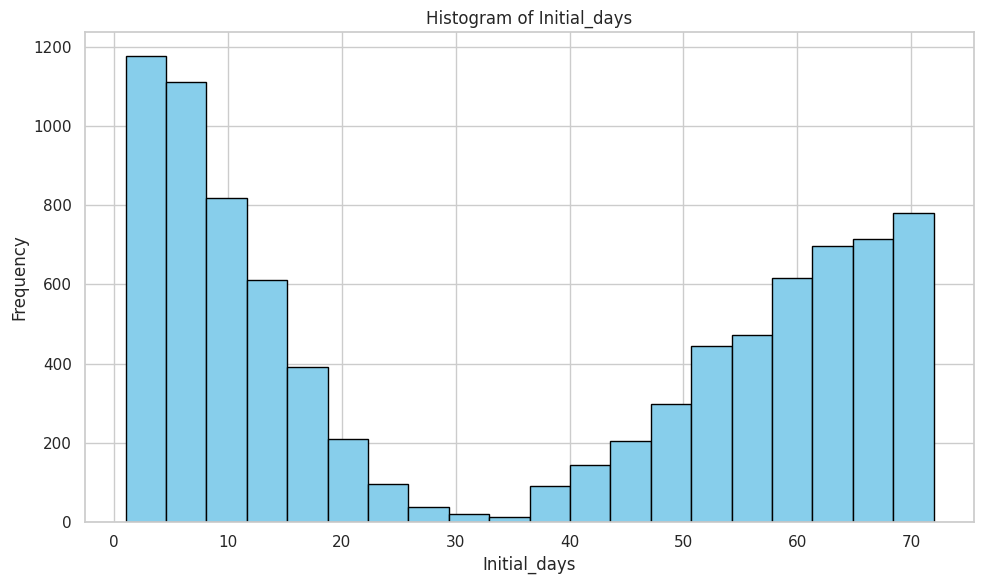

In [ ]:
# Create a loop to create visualizations for each column
for column in columns_to_check:
    plt.figure(figsize=(10, 6))  # Increase the figure size
    if pd.api.types.is_numeric_dtype(df[column]):
        # Create a histogram for numeric columns
        plt.hist(df[column], bins=20, color='skyblue', edgecolor='black')
        plt.title(f"Histogram of {column}")
        plt.xlabel(column)
        plt.ylabel("Frequency")
    else:
        # Create a count plot for categorical columns
        sns.countplot(data=df, x=column, palette='viridis')
        plt.title(f"Count Plot of {column}")
        plt.xlabel(column)
        plt.ylabel("Count")
        plt.xticks(rotation=45, ha='right')  # Rotate and align the x-axis labels

    plt.tight_layout()
    plt.show()

##### **Check for Duplicated Rows**

Checking for duplicate rows using the duplicated() function and counting the occurrences of duplicates using sum()

In [ ]:
# Check for duplicate rows
duplicate_rows = df.duplicated()

# Count the occurrences of duplicates
num_duplicates = duplicate_rows.sum()

print("Number of duplicate rows:", num_duplicates)

Number of duplicate rows: 0


##### **Checking Value Counts**

In [ ]:
# Get value counts for each column
for column in df.columns:
    value_counts = df[column].value_counts()
    print(f"Value counts for column '{column}':")
    print(value_counts)
    print()

Value counts for column 'Unnamed: 0':
1        1
6671     1
6664     1
6665     1
6666     1
        ..
3334     1
3335     1
3336     1
3337     1
10000    1
Name: Unnamed: 0, Length: 10000, dtype: int64

Value counts for column 'CaseOrder':
1        1
6671     1
6664     1
6665     1
6666     1
        ..
3334     1
3335     1
3336     1
3337     1
10000    1
Name: CaseOrder, Length: 10000, dtype: int64

Value counts for column 'Customer_id':
C412403    1
D294364    1
B203210    1
C20177     1
K216020    1
          ..
J694995    1
N704840    1
A197688    1
H115454    1
I569847    1
Name: Customer_id, Length: 10000, dtype: int64

Value counts for column 'Interaction':
8cd49b13-f45a-4b47-a2bd-173ffa932c2f    1
dc1799a6-61d1-44a3-9b94-b89584baddfc    1
dc6bab10-659b-4c78-ba87-87ffa3def32f    1
1cb70cc8-47b7-4192-8bed-faad0f27ab3b    1
06d0da86-5600-472d-a35d-7632775b5cd7    1
                                       ..
2d5c049d-0431-443f-a9d7-46f875998599    1
4ccc7838-5c2c-4a3c-9e3b-2a6

##### **Checking for Outliers**

In [ ]:
# Create an empty list to store DataFrames for potential outliers
potential_outliers_dfs = []

# Loop through each column in the DataFrame
for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        # Identify potential outliers for numerical columns using the IQR method
        potential_outliers = identify_outliers_iqr(df[column])
        if not potential_outliers.empty:
            potential_outliers_dfs.append(pd.DataFrame({'Column': [column], 'Potential_Outliers': [potential_outliers.to_list()]}))

# Concatenate the list of DataFrames into a single DataFrame
potential_outliers_df = pd.concat(potential_outliers_dfs, ignore_index=True)

# Display the DataFrame containing potential outliers
potential_outliers_df

,Column,Potential_Outliers
0,Lat,"[63.67959, 61.38199, 62.3338, 18.27102, 60.909..."
1,Lng,"[-170.48517, -123.43535, -148.52105, -122.7278..."
2,Population,"[40029, 35369, 40051, 38835, 40824, 49034, 457..."
3,Children,"[10.0, 9.0, 8.0, 10.0, 8.0, 10.0, 10.0, 8.0, 8..."
4,Income,"[167105.1, 122615.82, 132963.95, 128855.39, 13..."
5,VitD_levels,"[47.81347635, 25.51463527, 25.2687425, 25.5465..."
6,Full_meals_eaten,"[7, 6, 6, 7, 6, 6, 6, 6]"
7,VitD_supp,"[3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, ..."
8,TotalCharge,"[14804.31933, 14977.47866, 14391.61126, 14436...."
9,Additional_charges,"[28788.08031, 28102.9575, 28297.97033, 29021.2..."


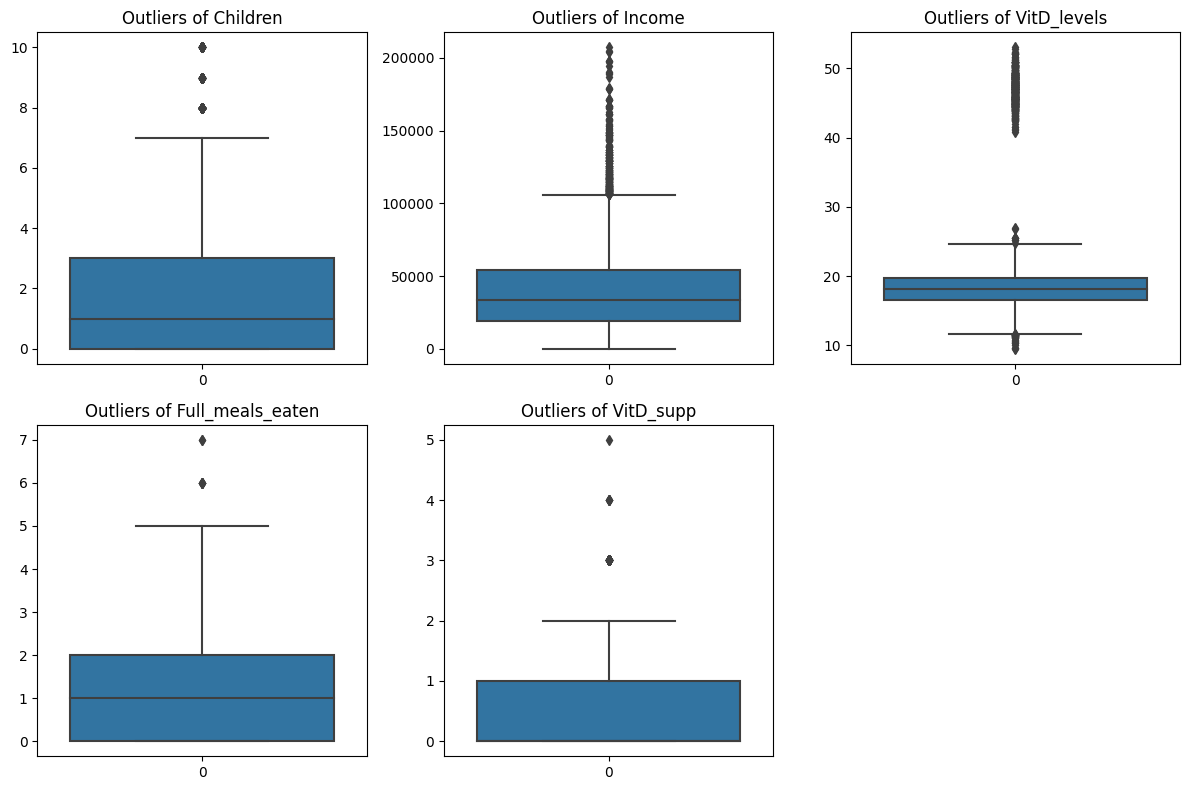

In [ ]:
# Columns with potential outliers
columns_to_investigate = ['Children', 'Income', 'VitD_levels', 'Full_meals_eaten', 'VitD_supp']

# Create box plots for each column
plt.figure(figsize=(12, 8))
for i, column in enumerate(columns_to_investigate, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df[column])
    plt.title(f'Outliers of {column}')
    plt.tight_layout()

plt.show()

# **Part III: Data Cleaning**

## Section D: Data Cleaning Process Summary


## D1: Findings on Data Quality Issues Describe the data quality issues found during the implementation of the data-cleaning plan.


### **Duplicated Rows**

There were no duplicated rows found in the dataset.

There was a signficant number of rows with missing data. 76.87% of the rows in the dataset has missing values of some kind.

| Metric                             | Value    |
|------------------------------------|---------|
| Count of rows with missing values   | 7687    |
| Percentage of rows with missing values | 76.87% |



### **Missing Data**

The missing data was present across 7 different columns.

| Category      | Count     |
|---------------|-----------|
| Children      | 2588      |
| Age           | 2414      |
| Income        | 2464      |
| Soft_drink    | 2467      |
| Overweight    | 982       |
| Anxiety       | 984       |
| Initial_days  | 1056      |

37.89% of the dataset has rows with 2 or more missing values present.

| Count of Missing Values | Count of Rows |
|-------------------------|---------------|
| Two or more             | 3789          |
| Three or more           | 1219          |
| Four or more            | 237           |
| Five or more            | 22            |
| Six or more             | 1             |
| Seven or more           | 0             |

Of the data missing the age and initial_days columns having missing data is of the most concern to me.


### **Outliers**

The dataset contains potential outliers in the Children, Income, VitD_levels, Full_meals_eaten, VitD_supp columns however while these columns may contain outliers their values are within an acceptable range.<br><br> I.e it is possible for a patient to have 8-10 children or to have eaten 7 full meals in a day.<br><br>The outliers in the Vit_D_levels and VitD_supp columns also fall within a range I feel comfortable leaving in the dataset.

### **Incorrect Data Types**

Children currently has a datatype of float64. This should be changed to int64 since these values should always be in whole numbers as it is not possible to have a fraction of a child<br><BR>
Some of the columns that have yes/no responses are coded as objects with strings representing yes and no while others like Overweight and Anxiety have 0 and 1 representing yes and no. These columns need to be standardized across the dataset.

Some columns representing categories like Education, Empployment, Gender and Timezone are objects. While this is acceptable it would be better to recast them as categories with pandas

### **Incorrect rounding in currency columns**

## **D2: Justification for Data Quality Mitigation Methods**

I performed the cleaning tasks following this order to avoid

Handle Categorical Columns with Binary Values<br>
Fill Missing Values<br>
Convert Data Types and Apply Formatting<br>

Handling the conversion of categorical columns with Yes/No to binary 0 and 1s makes the imputation of missing values later in the cleaning process easier. It also makes it easier to convert these columns to the correct data type later (int) and makes the data consistent across the data set.

I performed this step by creating a list of columns that needed to be transformed, created a replacement map to replace Yes with 1 and No with zero and then used the applymap function to peform the transformation.<P>

I then printed and displayed the applicable columns to ensure that all columns had been mapped correctly<P>

To address missing values, I opted to remove rows containing four or more missing values. This decision is grounded in the notion that when a considerable number of values are absent, the data integrity of those rows is significantly compromised. Hence, eliminating such instances enhances the overall quality and reliability of the dataset.

## **Subsection D3: Outcome of Each Data-Cleaning**

## **Subsection D4: Annotated Code for Mitigating Data Quality Issues**

In [ ]:
#Load dataset into pandas dataframe
#Reloading dataframe at this point to make the cleaning process easier to roll back without having to rerun any previous analysis
df_cleaned = pd.read_csv('/content/medical_raw_data.csv')

### **Handle Categorical Columns with Binary Values**

In [ ]:
# List of columns to transform
columns_to_transform = ['ReAdmis','HighBlood', 'Stroke',
                        'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain',
                        'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma']

# Replace values in the specified columns using applymap
replacement_map = {'Yes': 1, 'No': 0}
df_cleaned[columns_to_transform] = df_cleaned[columns_to_transform].applymap(lambda x: replacement_map.get(x, x))

In [ ]:
# Display the updated DataFrame
print(df_cleaned[columns_to_transform])

      ReAdmis  HighBlood  Stroke  Arthritis  Diabetes  Hyperlipidemia  \
0           0          1       0          1         1               0   
1           0          1       0          0         0               0   
2           0          1       0          0         1               0   
3           0          0       1          1         0               0   
4           0          0       0          0         0               1   
...       ...        ...     ...        ...       ...             ...   
9995        0          1       0          0         0               0   
9996        1          1       0          1         1               0   
9997        1          1       0          0         0               0   
9998        1          0       0          0         0               0   
9999        1          0       0          1         0               1   

      BackPain  Allergic_rhinitis  Reflux_esophagitis  Asthma  
0            1                  1                   0      

### **Fill Missing Values**

#### Rows with more or more missing values need to be dropped from the dataset.

In [ ]:
# Define the threshold for non-null values per row
threshold = len(df_cleaned.columns) - 3  # Keep rows with at least len(df.columns) - 3 non-null values

# Drop rows with four or more missing values
df_cleaned = df.dropna(thresh=threshold)

# Verify the result
print("Original number of rows:", len(df))
print("Number of rows after dropping:", len(df_cleaned))


Original number of rows: 10000
Number of rows after dropping: 9763


In [ ]:
# Check for rows with multiple missing values

rows_with_four_or_more_missing_clean = df_cleaned[df_cleaned.isnull().sum(axis=1) >= 4]

# Get count of rows with four or more missing values
count_rows_with_four_or_more_missing_clean = len(df_cleaned[df_cleaned.isnull().sum(axis=1) >= 4])

print("Count of rows with four or more missing values:", count_rows_with_four_or_more_missing_clean)



Count of rows with four or more missing values: 0


#### Drop rows with missing values in the ages or intial_days columns

In [ ]:
missing_values_age = df_cleaned['Age'].isna().sum()
missing_values_initial_days = df_cleaned['Initial_days'].isna().sum()

print("Missing values in Age column:", missing_values_age)
print("Missing values in Initial_days column:", missing_values_initial_days)

Missing values in Age column: 2254
Missing values in Initial_days column: 944


The initial cleaning step had a minimal effect of missing values in the age or initial days columns

In [ ]:
df_cleaned = df.dropna(subset=['Age', 'Initial_days'])


In [ ]:
#Verifying that the missing values in the Age and Initial_days columns have been dropped.
missing_values_age = df_cleaned['Age'].isna().sum()
missing_values_initial_days = df_cleaned['Initial_days'].isna().sum()

print("Missing values in Age column:", missing_values_age)
print("Missing values in Initial_days column:", missing_values_initial_days)



Missing values in Age column: 0
Missing values in Initial_days column: 0


#### **Fill in null values in the Children, Soft_drink, Overweight and Anxiety columns**

In [ ]:
columns_to_replace = ['Children','Overweight', 'Anxiety']

# Create a new DataFrame with the changes
df_cleaned_copy = df_cleaned.copy()
df_cleaned_copy.loc[:, columns_to_replace] = df_cleaned_copy.loc[:, columns_to_replace].fillna(0)

In [ ]:
# Convert the 'Soft_drink' column to numeric values
df_cleaned_copy['Soft_drink'] = pd.to_numeric(df_cleaned_copy['Soft_drink'], errors='coerce')

# Fill NaN values with 0.0
df_cleaned_copy['Soft_drink'].fillna(0.0, inplace=True)

In [ ]:
# Update the original DataFrame with the changes
# Temporarily suppress the SettingWithCopyWarning
with pd.option_context('mode.chained_assignment', None):
  df_cleaned.update(df_cleaned_copy)

In [ ]:
columns_to_check = ['Children', 'Soft_drink', 'Overweight', 'Anxiety']

null_counts = df_cleaned[columns_to_check].isnull().sum()
print(null_counts)


Children      0
Soft_drink    0
Overweight    0
Anxiety       0
dtype: int64


#### **Impute values into Income columns using MissForest**

In [ ]:
#Creates a copy of the dataframe so it can be compared to the results of the imputation
df_cleaned_pre_income_imputation = df_cleaned.copy()

In [ ]:
# Select the 'Income' column as a DataFrame
income_data = df_cleaned[['Income']]

In [ ]:
# Check for missing values in the 'Income' column
print(df_cleaned['Income'].isnull().sum())


1662


In [ ]:
# Suppress all warnings
warnings.filterwarnings("ignore")

# Select the columns that you want to use for imputation
columns_for_imputation = ['Age', 'Income', 'TotalCharge', 'Additional_charges' ]

# Create an instance of MissForest and fit it to your data
imputer = MissForest()
imputer.fit(df_cleaned[columns_for_imputation])

# Impute missing values
imputed_data = imputer.transform(df_cleaned[columns_for_imputation])

# Replace the columns with imputed values in the original DataFrame
df_cleaned[columns_for_imputation] = imputed_data

# Reset warnings to default behavior
warnings.resetwarnings()

# Now the 'Income' column should have its missing values imputed

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3


In [ ]:
print(df_cleaned['Income'].sample(10))

2       14370.1400
1962    34465.5200
8751    39007.9076
2434    56819.8800
5148    19178.9400
9539    31061.8100
3361    38395.1808
5875    41225.9511
7621    30530.7943
5572    56787.8200
Name: Income, dtype: float64


In [ ]:
df_cleaned.isna().sum()

Unnamed: 0            0
CaseOrder             0
Customer_id           0
Interaction           0
UID                   0
City                  0
State                 0
County                0
Zip                   0
Lat                   0
Lng                   0
Population            0
Area                  0
Timezone              0
Job                   0
Children              0
Age                   0
Education             0
Employment            0
Income                0
Marital               0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
VitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services        

In [ ]:
# Describe the 'Income' column in the original df
original_income_stats = df_cleaned_pre_income_imputation['Income'].describe()

# Describe the 'Income' column in the df_cleaned dataset
cleaned_income_stats = df_cleaned['Income'].describe()

# Display the statistics for comparison
print("Original 'Income' Column Statistics:")
print(original_income_stats)
print()

print("Cleaned 'Income' Column Statistics:")
print(cleaned_income_stats)


Original 'Income' Column Statistics:
count      5127.000000
mean      40596.054234
std       28881.883139
min         154.080000
25%       19306.465000
50%       34174.230000
75%       54421.925000
max      207249.130000
Name: Income, dtype: float64

Cleaned 'Income' Column Statistics:
count      6789.000000
mean      40782.767495
std       25620.294241
min         154.080000
25%       23470.380000
50%       37240.825400
75%       51237.487600
max      207249.130000
Name: Income, dtype: float64


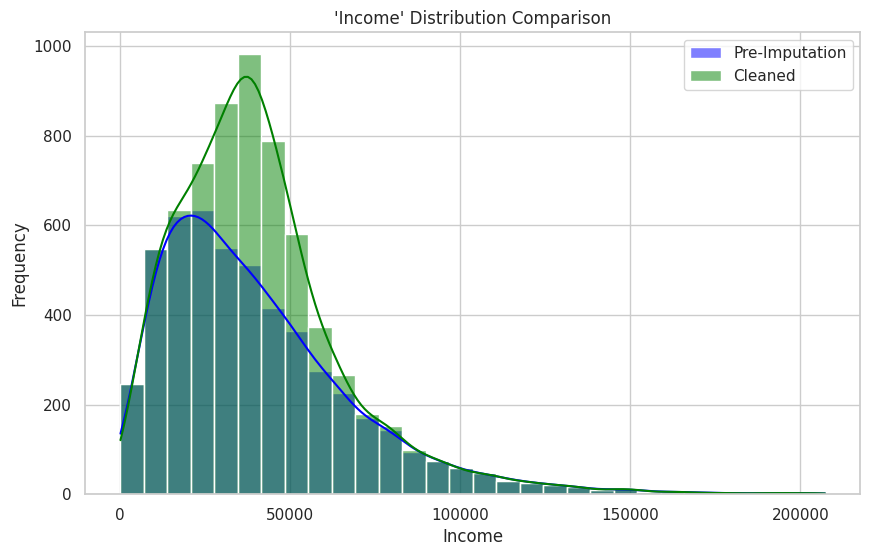

In [ ]:
# Set up the figure and axis
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Plot the histogram for both original and cleaned 'Income' columns
sns.histplot(df_cleaned_pre_income_imputation['Income'], bins=30, kde=True, color='blue', label='Pre-Imputation')
sns.histplot(df_cleaned['Income'], bins=30, kde=True, color='green', label='Cleaned')

# Add labels and legend
plt.title("'Income' Distribution Comparison")
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.legend()

# Show the plot
plt.show()


### **Convert Data Types and Apply Formatting**

#### **Apply Formatting**

#### **Correcting rounding in the currency based columns**

In [ ]:
columns_to_format = ['TotalCharge', 'Additional_charges', 'Income']

# Create a copy of the DataFrame to work with
df_cleaned_copy = df_cleaned.copy()

# Apply formatting to the specified columns using .loc indexer on the copy
df_cleaned_copy.loc[:, columns_to_format] = df_cleaned_copy[columns_to_format].apply(lambda x: round(x, 2))

# Suppress the SettingWithCopyWarning warning
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=SettingWithCopyWarning)
    # Update the main DataFrame with the changes from the copy
    df_cleaned.update(df_cleaned_copy)

# Display the updated DataFrame
print(df_cleaned[columns_to_format])

      TotalCharge  Additional_charges    Income
0         3191.05            17939.40  86575.93
1         4214.91            17613.00  46805.99
2         2177.59            17505.19  14370.14
3         2465.12            12993.44  39741.49
4         1885.66             3716.53   1209.56
...           ...                 ...       ...
9993      6850.73            27882.08  15654.69
9994      5857.56            12045.86  39797.05
9995      6651.24             8927.64  45967.61
9996      7851.52            28507.15  14983.02
9998      8462.83             7781.68  29702.32

[6789 rows x 3 columns]


#### **Correcting datatypes**

Converting columns Overweight, Anxiety and Children from float to int

In [ ]:
# List of columns to convert
columns_to_convert = ['Overweight', 'Soft_drink','Anxiety', 'Children']

# Suppress the SettingWithCopyWarning warning
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=SettingWithCopyWarning)

    # Convert specified columns to int
    df_cleaned[columns_to_convert] = df_cleaned[columns_to_convert].astype(int)

# Display the updated DataFrame
print(df_cleaned[columns_to_convert])


      Overweight  Soft_drink  Anxiety  Children
0              0           0        1         1
1              1           0        0         3
2              1           0        0         3
3              0           0        0         0
4              0           0        0         0
...          ...         ...      ...       ...
9993           1           0        0         1
9994           0           0        0         6
9995           0           0        1         0
9996           1           0        0         4
9998           1           0        0         3

[6789 rows x 4 columns]


In [ ]:
# Columns to convert
columns_to_convert = ['ReAdmis', 'Soft_drink', 'HighBlood', 'Stroke',
                      'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain',
                      'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma']

# Create a dictionary for mapping incase the previous transformation missed any
mapping = {'No': 0, 'Yes': 1}

# Suppress the SettingWithCopyWarning warning
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=SettingWithCopyWarning)
    df_cleaned.loc[:, columns_to_convert] = df_cleaned[columns_to_convert].replace(mapping).astype(int)

# Display the updated DataFrame
print(df_cleaned[columns_to_convert])


      ReAdmis  Soft_drink  HighBlood  Stroke  Arthritis  Diabetes  \
0           0           0          1       0          1         1   
1           0           0          1       0          0         0   
2           0           0          1       0          0         1   
3           0           0          0       1          1         0   
4           0           0          0       0          0         0   
...       ...         ...        ...     ...        ...       ...   
9993        0           0          1       0          0         0   
9994        0           0          0       0          1         0   
9995        0           0          1       0          0         0   
9996        1           0          1       0          1         1   
9998        1           0          0       0          0         0   

      Hyperlipidemia  BackPain  Allergic_rhinitis  Reflux_esophagitis  Asthma  
0                  0         1                  1                   0       1  
1          

In [ ]:
# List of columns to convert to category
columns_to_convert = ['Timezone', 'Job', 'Education', 'Employment', 'Marital', 'Gender', 'Initial_admin', 'Services', 'Area', 'Complication_risk']

# Suppress the SettingWithCopyWarning warning
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=SettingWithCopyWarning)
    # Convert specified columns to category
    df_cleaned[columns_to_convert] = df_cleaned[columns_to_convert].astype('category')

# Display the updated DataFrame
print(df_cleaned[columns_to_convert])


              Timezone                                   Job  \
0      America/Chicago      Psychologist, sport and exercise   
1      America/Chicago          Community development worker   
2      America/Chicago               Chief Executive Officer   
3      America/Chicago                   Early years teacher   
4     America/New_York           Health promotion specialist   
...                ...                                   ...   
9993  America/New_York                       Legal executive   
9994  America/New_York                      Technical author   
9995  America/New_York                Programmer, multimedia   
9996  America/New_York         Restaurant manager, fast food   
9998    America/Denver  Outdoor activities/education manager   

                                     Education Employment    Marital  Gender  \
0               Some College, Less than 1 Year  Full Time   Divorced    Male   
1     Some College, 1 or More Years, No Degree  Full Time    Married  F

In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6789 entries, 0 to 9998
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Unnamed: 0          6789 non-null   int64   
 1   CaseOrder           6789 non-null   int64   
 2   Customer_id         6789 non-null   object  
 3   Interaction         6789 non-null   object  
 4   UID                 6789 non-null   object  
 5   City                6789 non-null   object  
 6   State               6789 non-null   object  
 7   County              6789 non-null   object  
 8   Zip                 6789 non-null   int64   
 9   Lat                 6789 non-null   float64 
 10  Lng                 6789 non-null   float64 
 11  Population          6789 non-null   int64   
 12  Area                6789 non-null   category
 13  Timezone            6789 non-null   category
 14  Job                 6789 non-null   category
 15  Children            6789 non-null   in

In [ ]:
df_cleaned.sample(10)

,Unnamed: 0,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,VitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
4258,4259,4259,T635601,ebdac73e-6f3d-4a18-a3ae-c96026ce0413,430369b12e2b49bc1bfcb7fb15a656d0,Cleveland,OH,Cuyahoga,44104,41.48223,-81.62681,19640,Rural,America/New_York,Occupational psychologist,0,19.0,"Some College, 1 or More Years, No Degree",Retired,43545.89,Separated,Female,0,17.816038,4,1,0,0,Emergency Admission,1,0,Low,0,1,1,0,1,0,1,1,0,Blood Work,8.308065,3055.96,6897.48,4,2,3,3,2,4,4,4
7908,7909,7909,Z762202,28a8e236-f046-41f9-bec4-abdbcfa6f065,41d6b7b2c48a625f94fa4cd77d19512f,Austin,TX,Travis,78756,30.32227,-97.74017,8323,Urban,America/Chicago,"Engineer, petroleum",1,50.0,Regular High School Diploma,Part Time,55787.74,Never Married,Female,1,19.401481,5,1,0,0,Emergency Admission,0,0,High,1,0,0,1,1,0,1,1,0,Intravenous,67.398082,9356.37,9175.23,5,5,3,3,4,4,4,4
7907,7908,7908,G196516,efb45409-0d80-4808-a84d-78b6267ffede,d4ccd8210a461d2ea94e45a660154358,Quemado,NM,Catron,87829,34.32592,-108.65875,683,Rural,America/Denver,Electronics engineer,1,49.0,Bachelor's Degree,Full Time,51375.87,Divorced,Female,1,19.517622,3,0,0,0,Emergency Admission,0,0,Low,0,0,1,0,0,1,0,1,0,Blood Work,65.729857,7796.18,8544.22,3,2,2,2,3,1,3,3
7121,7122,7122,X171803,0f3c40e7-230b-47cc-8acb-c749a4c5a321,cba46f15ebb65b481c0790bd6e0c9bf4,Towson,MD,Baltimore,21286,39.41506,-76.57442,20483,Urban,America/New_York,"Designer, ceramics/pottery",0,71.0,Master's Degree,Full Time,49487.93,Never Married,Female,1,18.613320,5,0,0,0,Elective Admission,1,0,Low,1,0,0,0,0,0,1,1,0,Blood Work,59.547559,6942.31,22973.27,4,3,3,3,4,4,3,2
2229,2230,2230,U551430,52c081e0-8fcf-4230-9c67-b7da30d99ffa,bc358abcd79c26bc09096cba0fa0334a,Bruneau,ID,Owyhee,83604,42.50827,-115.80560,535,Rural,America/Boise,Water quality scientist,1,19.0,"Some College, 1 or More Years, No Degree",Full Time,56934.14,Widowed,Female,0,21.054627,4,0,1,0,Emergency Admission,1,0,Low,1,1,1,0,0,0,1,1,1,Blood Work,7.000044,4000.89,6832.63,2,1,3,4,4,3,4,4
3455,3456,3456,F986202,97ba901f-9a88-400d-b6a5-ae716b83bba7,9e3ddb2fea86dfb559b25af02a21c151,Ashfield,MA,Franklin,1330,42.51377,-72.81395,1367,Urban,America/New_York,Recruitment consultant,1,60.0,Associate's Degree,Full Time,97729.03,Widowed,Female,0,50.297888,4,2,1,0,Elective Admission,0,1,Low,1,0,0,1,0,0,0,1,0,Intravenous,2.006261,14543.71,9915.88,2,3,1,3,2,2,2,3
4616,4617,4617,G970293,e3e59f24-703f-42f5-b1c5-dafd3ee8ac19,83d8dc8998f59d943fa32f3eccd21f99,Bellaire,TX,Harris,77401,29.70443,-95.46175,19283,Suburban,America/Chicago,Graphic designer,1,79.0,"9th Grade to 12th Grade, No Diploma",Full Time,26556.80,Married,Female,0,19.946310,7,3,0,0,Emergency Admission,0,0,Medium,1,0,0,1,1,0,0,1,0,Intravenous,18.412846,4700.38,13422.02,4,4,5,5,2,4,3,3
7283,7284,7284,F506342,fa9e187c-e6da-4463-aa0d-8f1a1f099048,fa4ca39798e24bbc803710ab0903f8ab,Knoxville,IL,Knox,61448,40.93363,-90.24678,3837,Urban,America/Chicago,Wellsite geologist,0,37.0,Associate's Degree,Unemployed,28538.69,Separated,Female,1,22.291667,6,0,0,0,Elective Admission,0,0,Medium,0,0,0,1,1,0,1,1,1,CT Scan,63.831425,7703.86,6233.34,6,5,5,4,3,4,5,6
9554,9555,9555,F127888,5110a773-39b6-4c4d-bf1d-ebf4dd082099,32ffd558640506b6655cebd6fbc3edc5,Maroa,IL,Macon,61756,40.03121,-88.97344,2413,Rural,America/Chicago,Warehouse manager,2,70.0,Associate's Degree,Part Time,39905.90,Separated,Male,1,44.789365,4,2,1,0,Emergency Admission,1,0,Medium,0,1,1,0,0,0,0,1,0,Blood Work,68.591191,19403.19,23411.35,5,5,3,4,3,3,4,3
8067,8068,8068,I608955,b5120586-dae0-4777-ab65-0d310c22fac6,cdd42629373a5eac12157d722a072da3,Athol,NY,Warren,12810,43.49698,-

### **Subsection D5: Cleaned Dataset**

CSV file attached to submission


In [ ]:
# Save the DataFrame as a CSV file
df_cleaned.to_csv('medical_cleaned.csv', index=False)

### **Subsection D6: Limitations of Data Cleaning Process**

### **Subsection D7: Impact of Limitations on Analysis**

## **Section E: Application of Principal Component Analysis (PCA)**


In [ ]:
df_pca = df_cleaned.copy()


### **Subsection E1: Principal Components Identification**

In [ ]:
# Select numerical columns for PCA
numerical_cols = [
    'VitD_levels',
    'VitD_supp',
    'Full_meals_eaten',
    'Doc_visits',
    'Initial_days',
    'TotalCharge',
    'Additional_charges',
    'Income'
] + ['Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8']

numerical_df = df_pca[numerical_cols]


In [ ]:
# Normalize or standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_df)


In [ ]:
# Apply PCA
num_principal_components = 16  # Choose the number of principal components
pca = PCA(n_components=num_principal_components)
principal_components = pca.fit_transform(scaled_data)

In [ ]:
# Create a DataFrame with the principal components
pc_df = pd.DataFrame(data=principal_components, columns=[f"PC{i}" for i in range(1, num_principal_components + 1)])

# Display the DataFrame with principal components
print(pc_df)

           PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0    -1.537569 -1.171583  0.281450  0.198931  1.563895 -1.500141  0.756543   
1    -0.369891 -0.690801 -0.086792  1.091488  0.395113  1.317076  0.569485   
2    -0.211514 -1.412245 -0.746631  0.668509 -1.076851  0.804396  0.120309   
3     2.411059 -1.392681  0.385622  0.382736 -0.690727  0.082688  0.855268   
4    -2.389097 -1.643766 -0.187809 -1.397666  0.078935  0.771667 -0.930270   
...        ...       ...       ...       ...       ...       ...       ...   
6784  4.251760  0.541271  1.095331  0.654246  0.546094  2.347832 -0.429532   
6785 -2.610499 -0.205393  1.442023 -1.367169  1.189058  1.665239  0.267507   
6786 -2.112317  0.187176 -0.096966 -0.204926 -0.080119  1.114296  0.319738   
6787 -0.679928  0.851328  1.460196 -0.197010  0.271872  1.114198 -1.043908   
6788  0.812822  1.233105  0.977742 -0.180895 -0.173630  0.602086 -0.573340   

           PC8       PC9      PC10      PC11      PC12      PC1

In [ ]:
# Create a DataFrame to store the PCA loading values
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6','PC7', 'PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16'], index=numerical_cols)

# Display the loading values for the principal components
print(loadings.iloc[:, :])


                         PC1       PC2       PC3       PC4       PC5  \
VitD_levels        -0.018236  0.528770  0.027257  0.367795 -0.070820   
VitD_supp          -0.005480  0.028982  0.006579 -0.156642  0.551705   
Full_meals_eaten    0.004878 -0.011607  0.035938  0.673498 -0.158129   
Doc_visits          0.002647  0.005909 -0.003910  0.069791  0.383934   
Initial_days       -0.023741  0.466001  0.052717 -0.418981  0.043925   
TotalCharge        -0.027185  0.703125  0.050887  0.005165 -0.014839   
Additional_charges -0.002648  0.019512 -0.014904  0.448233  0.396293   
Income             -0.003532  0.001201 -0.010748  0.057629  0.597974   
Item1               0.456631 -0.006923  0.291510  0.005720 -0.004172   
Item2               0.427875  0.000438  0.293556 -0.009133  0.011405   
Item3               0.398614 -0.013540  0.292178 -0.000487  0.010869   
Item4               0.147495  0.041383 -0.556413  0.010404 -0.018659   
Item5              -0.183195 -0.052066  0.582114 -0.002158  0.00

In [ ]:
# Display the loading values for the first 6 principal components
print(loadings.iloc[:, :6])

                         PC1       PC2       PC3       PC4       PC5       PC6
VitD_levels        -0.018236  0.528770  0.027257  0.367795 -0.070820 -0.196812
VitD_supp          -0.005480  0.028982  0.006579 -0.156642  0.551705  0.472884
Full_meals_eaten    0.004878 -0.011607  0.035938  0.673498 -0.158129  0.146067
Doc_visits          0.002647  0.005909 -0.003910  0.069791  0.383934 -0.622373
Initial_days       -0.023741  0.466001  0.052717 -0.418981  0.043925  0.199654
TotalCharge        -0.027185  0.703125  0.050887  0.005165 -0.014839 -0.009180
Additional_charges -0.002648  0.019512 -0.014904  0.448233  0.396293  0.428455
Income             -0.003532  0.001201 -0.010748  0.057629  0.597974 -0.318641
Item1               0.456631 -0.006923  0.291510  0.005720 -0.004172  0.004375
Item2               0.427875  0.000438  0.293556 -0.009133  0.011405  0.006052
Item3               0.398614 -0.013540  0.292178 -0.000487  0.010869  0.012284
Item4               0.147495  0.041383 -0.556413  0.

In [ ]:
# Calculate the covariance matrix
cov_matrix = np.dot(scaled_data.T, scaled_data) / (scaled_data.shape[0] - 1)

# Initialize a list to store eigenvalues
eigenvalues = []

# Loop through each eigenvector (principal component) in PCA components
for eigenvector in pca.components_:
    # Calculate the eigenvalue using eigenvector and covariance matrix
    eigenvalue = np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector))
    eigenvalues.append(eigenvalue)

# The 'eigenvalues' list now contains the calculated eigenvalues for each principal component
for eigenvalue in eigenvalues:
    print(eigenvalue)

2.952422525354309
1.9779287390155322
1.6509197381285956
1.043984065092799
1.0299373844096777
1.0071933506604362
0.9852384913120131
0.9735223242194285
0.9574154698644943
0.770408146666238
0.6998202153665409
0.5837738266184237
0.5383915636163827
0.47362675612476424
0.3275365371576047
0.030237967158829142


### **Subsection E2: Justification for Reduced Number of Principal Components**

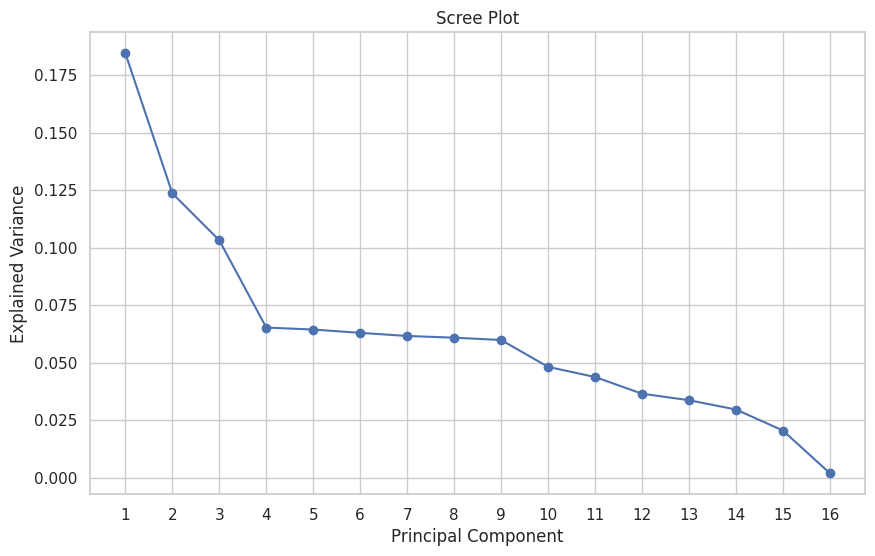

In [ ]:
explained_variance = pca.explained_variance_ratio_
num_components = len(explained_variance)

plt.figure(figsize=(10, 6))
plt.plot(range(1, num_components + 1), explained_variance, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.xticks(range(1, num_components + 1))
plt.grid(True)
plt.show()

I would reduce the number of principal components to 6 based on the elbow of the scree plot being at 4 but also pplying the Kaiser-Guttman rule and retain only those principal components whose corresponding eigenvalues are greater than or equal to 1.<p>
Based on the scree plot alone choosing 4 PCs maybe too little so I feel 6 is the best compromise in this case.

| PC       | Eigenvalue |
|----------|------------|
| PC1      | 2.952      |
| PC2      | 1.978      |
| PC3      | 1.651      |
| PC4      | 1.044      |
| PC5      | 1.016      |
| PC6      | 1.001      |
| PC7      | 0.974      |
| PC8      | 0.961      |
| PC9      | 0.771      |
| PC10     | 0.700      |
| PC11     | 0.584      |
| PC12     | 0.538      |
| PC13     | 0.474      |
| PC14     | 0.328      |
| PC15     | 0.030      |





**Principal component loading for the first 6 principal components**

|                 |     PC1 |     PC2 |     PC3 |     PC4 |     PC5 |     PC6 |
|:----------------|--------:|--------:|--------:|--------:|--------:|--------:|
| VitD_levels     | -0.0182 |  0.5288 |  0.0273 |  0.3686 | -0.0572 | -0.2031 |
| VitD_supp       | -0.0055 |  0.0290 |  0.0066 | -0.1624 |  0.5409 |  0.4888 |
| Full_meals_eaten |  0.0049 | -0.0116 |  0.0360 |  0.6756 | -0.1538 |  0.1420 |
| Doc_visits       |  0.0026 |  0.0059 | -0.0039 |  0.0657 |  0.4009 | -0.5962 |
| Initial_days    | -0.0237 |  0.4660 |  0.0528 | -0.4195 |  0.0280 |  0.2061 |
| TotalCharge     | -0.0272 |  0.7031 |  0.0509 |  0.0053 | -0.0153 | -0.0093 |
| Additional_charges | -0.0026 |  0.0195 | -0.0149 |  0.4438 |  0.3885 |  0.4435 |
| Income          | -0.0039 |  0.0028 | -0.0111 |  0.0452 |  0.6053 | -0.3177 |
| Item1            |  0.4566 | -0.0069 |  0.2915 |  0.0058 | -0.0038 |  0.0038 |
| Item2            |  0.4279 |  0.0004 |  0.2936 | -0.0094 |  0.0106 |  0.0065 |
| Item3            |  0.3986 | -0.0135 |  0.2922 | -0.0006 |  0.0107 |  0.0123 |
| Item4            |  0.1475 |  0.0414 | -0.5564 |  0.0107 | -0.0192 |  0.0331 |
| Item5            | -0.1832 | -0.0521 |  0.5821 | -0.0021 |  0.0050 | -0.0133 |
| Item6            |  0.4072 |  0.0374 | -0.1737 |  0.0192 | -0.0186 | -0.0122 |
| Item7            |  0.3592 |  0.0327 | -0.1591 | -0.0089 |  0.0087 |  0.0183 |
| Item8            |  0.3125 |  0.0188 | -0.1782 | -0.0356 |  0.0204 | -0.0445 |



PC1: The largest loading values are associated with "Item1," "Item2," "Item3," and "Item6," indicating that these original features contribute significantly to PC1. This component might represent some general health-related factors.<P>

PC2: The major contributors to PC2 are "VitD_levels," "VitD_supp," and "TotalCharge," suggesting that this component could capture factors related to vitamin D levels and healthcare charges.<P>

PC3: "Item4," "Item5," "Item7," and "Item8" have notable loadings in PC3. This component could represent variations in specific medical procedures or treatments.<P>

PC4: PC4's primary contributors are "Full_meals_eaten" and "Initial_days," which could imply a relationship between dietary habits and the duration of initial hospital stays.<P>

PC5: "Income" and "Item7" have substantial loadings in PC5. This component might capture patterns related to income and specific medical treatments.<P>

PC6: PC6 appears to have contributions from "VitD_supp," "Additional_charges," and "Income." It might represent a combination of vitamin D supplementation, additional charges, and income-related factors<P>

### **Subsection E3: Benefits of PCA**



PCA allows organizations to deal with larger complex datasets in a manageable way but transforming high-dimensional data into a smaller set of uncorrelated principal components. It helps simplify data representation and facilitates analysis. It makes data visualization easier and makes it simpler to identify patterns and relationships.<P>

PCA helps with noise reduction, resulting in cleaner and more accurate insights.Its ability to reveal hidden patterns in the data contributes to uncovering valuable insights that might remain obscured in the original feature space.

# Part IV: Supporting Documents



## **Section F: Video Demonstration**



In [ ]:
https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=0ff6e6c2-fc60-4527-b4f5-b05a00158814

## **Section G: Acknowledgement of Third-Party Code**


https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas



Section H: Acknowledgement of Content Sources
Acknowledge sources for quoted, paraphrased, or summarized content.